In [15]:
import requests
import json
import time
import pandas as pd
import random

url =  'http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=gbk&oe=gbk&page=2&page_size=20&jsvar=loader_1536370726549_48580372'

#本实验的特色是第五部分的   省份信息处理     

#回顾一下对  groupby函数的使用   groupby('聚合的标签')['要被聚合的值的标签'].函数count max min （）
    
#sum 可以用于合并list   sum([list1,list2,list3],[])

In [16]:
#  第一部分   爬虫
comments = pd.DataFrame(columns = ['page','jsons','cmntlist','replydict'])

def getComments(page):
    
    #第一步创建开始结束时间
    start = int(time.time()*1000)   #时间戳本身后面有一堆小树，经过观察，url中取开始时间前13位，那就使用时间戳的前13位，这里乘以1000然后取整就是刚好13
    end_ran = start + random.randint(100,1000)
    end = str(end_ran)[-8:]
    #print(len(str(start)),end)
    
    #第二步组合url
    url = 'http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=cj&newsid=comos-hhkuskt2879316&group=0&compress=0&ie=gbk&oe=gbk&page={}&page_size=20&jsvar=loader_{}_{}'.format(page,start,end)
    #print(url)
    
    #第三步发起请求  获取dict 
    r = requests.get(url)
    js = r.text[len('var loader_1536372601379_72602347='):]  #提取字典，删去前面的一串字符
    cmntlist = json.loads(js)['result']['cmntlist']
    replydict = json.loads(js)['result']['replydict']
    #第四部提取dict信息
    '''
    for i in range(len(cmntlist)):
        nick = cmntlist[i]['nick']
        times = cmntlist[i]['time']
        content = cmntlist[i]['content']
        area = cmntlist[i]['area']
        print(nick,times,area,content)
    教学里面是先储存dict之后在做提取，这里也如此
    '''
    
    comments.append({'page':page,'jsons':js,'cmntlist':cmntlist,'replydict':replydict},ignore_index=True)
    comments.loc[page] = {'page':page,'jsons':js,'cmntlist':cmntlist,'replydict':replydict}
    for num,cmnt in  enumerate(cmntlist):
            print(page, cmnt['nick'], cmnt['time'], cmnt['content'], cmnt['area'])
    if page%5==0:
            time.sleep(random.randint(0,2)) # 每5页随机停0-2秒，作为简单的防反爬的一步


            
for i in range(1,200):
    try:
        getComments(i)
    except:
        print('err')
    
            
            

comments.to_csv('Sina_Finance_Comments_1_20180810.csv',index=False,encoding='utf-8')


1 lanbolanbo就是我 2018-09-07 03:03:49 脑子有病。每个人有每个人的消费观。你爱存钱那是你自己的良好习惯。别人喜欢投资 喜欢购买等值服务是人家的选择。何来畸形一说？ 广东广州
1 仰望星空的wo牛 2018-09-01 19:51:29 17个点的增值税 广东深圳
1 严家可爱豆 2018-08-28 22:05:46 哈哈 江西南昌
1 顾小慢Catherine 2018-08-28 19:23:37 爸爸妈妈买房，说啃老。自己不买房，说没上进心。不生娃，说是自私。那是因为大部分90后的我们真的不富裕，没法一下子拿出几十百万买房子。这也会被说，为什么不努力工作？[皱眉]要我们怎样？ 重庆
1 顾小慢Catherine 2018-08-28 19:23:25 80后买不起房，90后不想买房。 连交通信息卡都发的信用卡，现在又怪我们借贷过度，没有辛苦攒钱？ 我们努力工作，熬成秃头，辛辛苦苦赚钱想用用智能机，想旅旅游，也错了？不想辛辛苦苦攒钱还房贷，也错了？ 重庆
1 依然是个黄油君 2018-08-26 15:33:55 十年前的媒体：当60岁的中国人终于攒到够钱买了个房子时，60岁的美国人则还清了住了30年房子的贷款。中国人只知道勤劳苦干的挣钱，而美国人则享受了幸福的一生。 现在的媒体：你们这些贷款的年轻人，正带领国家走向危机。 中国年轻人：？？？ 四川雅安
1 bitzhyu 2018-08-26 00:58:18 从11年借到18年，说的不就是我嘛[doge] 江苏南京
1 傲娇免 2018-08-24 12:32:33 还有可以送孩子出国留学 然后 ……你懂了么 河南郑州
1 傲娇免 2018-08-24 12:30:59 不懂啥 炒房可以发家致富 而你却拿来住 简直浪费 建议你有机会也去炒房 根本不用上班 天天吃喝玩乐 旅游自拍星巴克 河南郑州
1 Grazy木 2018-08-23 18:01:37 哦。[摊手][摊手][摊手] 广东东莞
1 熊叔看过来 2018-08-23 01:52:25 买不起房还不让我喝星巴克？[doge] 北京
1 稽莱织lydia 2018-08-22 19:35:32 哈哈哈哈哈哈 湖南长沙
1 张儁乂 2018-08-22 13:39:05 家庭资产負债表的权益资本/总资产 广东广州
1 杰仕

9 十陵第一建筑施工队 2018-08-09 22:16:55 买不起房的我[泪][泪] 四川内江
9 十陵第一建筑施工队 2018-08-09 22:15:30 直接领 四川内江
9 十陵第一建筑施工队 2018-08-09 22:14:54 我没吃他的穿他的。何错之有 四川内江
9 十陵第一建筑施工队 2018-08-09 22:13:37 我也想，但是我有那个能力吗[摊手][摊手] 四川内江
9 十陵第一建筑施工队 2018-08-09 22:12:44 现在好多人一辈子房奴，还几十年的都有 四川内江
9 十陵第一建筑施工队 2018-08-09 22:11:49 现在房价就没有低于一万的了吧，有都很少 四川内江
9 江花醉月 2018-08-09 22:03:46 感受颇深 江西赣州
9 我是帅哥_璇哥哥 2018-08-09 21:56:14 我也不借，但是他这觉得正常消费是不对的，我就不能忍，累死累活赚点钱还不能花的舒服吗~~~ 福建龙岩
9 锌楠神 2018-08-09 21:35:51 @Asuka---02  真滴牛批 黑龙江哈尔滨
9 高处胜寒_ 2018-08-09 20:49:45 杠杆率那么大都在哪儿了你们自己心里没有b数吗[费解] 北京海淀
9 Ruler丿 2018-08-09 20:36:21 不说了 我还有30年的房贷还没还[doge] 浙江
9 nightfall沉淀 2018-08-09 19:21:57 背上，匍匐前进 陕西西安
9 蜡笔猪小呆 2018-08-09 18:49:04 人在家中坐，锅从天上来 云南昆明
9 手机用户9274694927 2018-08-09 18:35:54 我低调 上海
9 北郭先生_Morning 2018-08-09 18:35:45 可能是50年代生的年轻人吧！ 辽宁丹东
9 福建商业一城 2018-08-09 17:54:33 喝星巴克才多少钱[吃瓜]我觉得我死命消费一年也不到一万 福建
9 nightfall沉淀 2018-08-09 17:34:17 背 陕西西安
9 樱狼永恒 2018-08-09 17:03:29 用了还不是要还的，物价飞涨，人民币贬值，我同样的钱现在能买的东西过段时间可能就买不了了，为什么不现在买 四川成都
9 木花篱 2018-08-09 16:50:17 

18 全世界最好的Tao小狗 2018-08-09 06:02:25 哈哈哈哈哈 穷人没有选择[跪了] 英国英格兰
18 蝴蝶_喵喵喵 2018-08-09 05:50:26 新周刊好刚！ 四川成都
18 Sugarpppppp 2018-08-09 05:32:44 完全没有想法买不动产啥的…就有钱就花喽，开心就好呀 江苏泰州
18 Sugarpppppp 2018-08-09 05:32:10 emmmm我是那种yolo族，人应该享受人生，即使需要承担风险。就是鼓励人们不怕冒险，想做什么就做什么，享受人生，因为只会活一次。 江苏泰州
18 你有事吗0 2018-08-09 05:08:40 我可真谢谢您了......还是头一回听说这么荒谬的理论 四川成都
18 hksyf 2018-08-09 03:50:33 心情复杂 江苏无锡
18 _G-Dream弋_ 2018-08-09 03:28:34 不借钱就还好 四川德阳
18 郭郭郭ry 2018-08-09 03:06:53 哇 什么鬼，滚喔[太开心][太开心][太开心]～ 瑞士
18 脑袋有一个大猫 2018-08-09 02:38:09 不经意间  又背锅了？ 辽宁大连
18 袁拾柒 2018-08-09 02:29:37 能走还是走，可以考虑去读个书 上海
18 熊猫麒 2018-08-09 02:25:43 我也下定决心走了… 北京
18 芝士就是战斗力 2018-08-09 02:21:44 不贷款几个年轻人买得起房？[微笑][微笑][微笑] 山东潍坊
18 Jhch2016 2018-08-09 02:14:22 顶一个 辽宁大连
18 爱情公寓字幕组 2018-08-09 02:10:30 基本的阅读理解能力都没有[允悲] 广东深圳
18 小愚大王 2018-08-09 02:08:02 这段话是《知识大迁移》里的 北京海淀
18 木頭Ricky 2018-08-09 02:05:18 老罗没说 辽宁锦州
18 小法师罗宁 2018-08-09 02:02:57 …… 广东广州
18 一个洋芋粑粑 2018-08-09 01:57:11 很多人没有看文章的内容吧？韩国其实出现过这种问题的。 云南昆明
18 永一的马甲 2018-08-09 01:54:12 必须的，我很有觉悟的[吃瓜] 北京
1

28 selenah2 2018-08-08 18:29:01 只能说明发着微博的是个老年人 而且不喜欢现在的年轻人[可爱] 江苏南京
28 人在旅途的Gao 2018-08-08 18:27:46 养儿防老和攒钱养老，哪个更靠谱? 北京
28 种花家必胜 2018-08-08 18:26:07 当然是媒体了 辽宁辽阳
28 opksta 2018-08-08 18:23:59 我们能干点啥...... 山东青岛
28 长-离 2018-08-08 18:23:38 定义是“又工作挣钱又不买房不生孩子，主要收入都用来提高自己生活水平”的“年轻人”，也就是说，割不动的韭菜 安徽合肥
28 尛白186 2018-08-08 18:23:29 怕是没有适合🐻 这体型的绳子 山东济南
28 -YJeye 2018-08-08 18:22:11 管好你自己 陕西延安
28 phyhuchang 2018-08-08 18:22:11 [失望][失望][失望] 江苏徐州
28 L陸_ 2018-08-08 18:22:11 得看多种选择中的一个合适的抉择[二哈] 浙江
28 -MIO-米沫 2018-08-08 18:22:07 他我还以为我点了守望博主[费解][费解][费解][费解]怎么哪里都有你这个实话精 上海
28 七瀬_nanase 2018-08-08 18:22:05 锅从天上来 日本
29 被诅咒的章鱼 2018-08-08 18:21:59 可能……你已经不年轻了[笑而不语] 浙江
29 明光菌 2018-08-08 18:21:40 人在家中坐，锅从天上来 上海
29 乌牛酱 2018-08-08 18:21:12 没意思 广东广州
29 -Farewell__ 2018-08-08 18:21:01 买不起房买个手机还不行[二哈] 广东韶关
29 Siantte 2018-08-08 18:20:49 我觉得说的很对，我们应该减少消费，坚决不买房，给国家减轻负担 法国
29 锡锡西西嘻嘻嘻 2018-08-08 18:20:43 ridiculous 上海
29 PVG进近 2018-08-08 18:20:21 综合各大事件 真正带领的人是谁都清楚。至于年轻人是不是正在带领这个风潮 我没有研究过 但至少我们都知道这个编辑 是个带领我们走向危机的人 上海
2

36 神一样的薛定谔 2018-08-08 16:48:06 这批韭菜不行啊 江苏南京
36 翔哦 2018-08-08 16:47:51 这些消费根本无法给我造成债务，房子就能[摊手] 浙江温州
36 一杯珍珠奶茶_ 2018-08-08 16:47:27 赚钱不花，留着放棺材？！ 广东广州
36 他是曦光- 2018-08-08 16:46:53 怎么了？出去旅游碍着您的眼了？父母愿意出钱让我出国涨见识难道有错？真是一股子酸味... 四川成都
36 青山虫鸣2016 2018-08-08 16:46:45 外甥12岁，跟我说他们的同学都在比穿着，要穿耐克、阿迪等大牌，比手机比家世，而我外甥不在乎什么名牌，也不和同学讨论这些，于是同学疏远他，觉得他怪。他也觉得自己在班级里很孤单。我在想现在一些孩子的价值观是怎么了。 湖南长沙
36 你还是不了解我 2018-08-08 16:46:44 借贷行为确实存在着很多风险，但若说年轻人借贷会导致全国整个金融系统的悲剧性后果，甚至武断地说中国年轻人正带领国家走向危机，实属一家之言，这逻辑不敢恭维！ 河北秦皇岛
36 四川阿红 2018-08-08 16:46:44 这是个问题了[喵喵] 四川德阳
36 大脸猫塔普 2018-08-08 16:46:32 这么差就别生孩子了，反正下一代还这样啊[微笑] 英国苏格兰
36 帟幕 2018-08-08 16:45:53 看文章我以为是哪个不过脑的大学生为毕业通宵写的论文 山西
36 板烧鸡腿堡CCC 2018-08-08 16:45:43 有可能是章泽天的弟弟 广东深圳
36 他是曦光- 2018-08-08 16:45:19 其他先不说，父母愿意出钱让我去国外旅游读书怎么了？晒个旅游照怎么就碍着您的眼了？年轻人多走出国门涨涨见识难道不是一件极好的事吗？ 四川成都
36 11afantasy 2018-08-08 16:45:16 明明家里多套房 湖北武汉
36 哔叔叔 2018-08-08 16:44:42 回复 @卡兹SAMA今天也帅的和小鸟一样:是啊，广州内城20-30年楼龄二手6W，珠江新城10+W，然后新并了两个地级市通地铁8K一直飙。所以广州看起来好像生活成本很低，很不像一线。 广东广州
36 一颗大大大大大豆 2018-08-08 16:44:28 要是大多数年轻人凭

44 Me丶林焕然 2018-08-08 15:41:32 我话后半生的工资贷款买房就是对的咯？ 江苏南京
44 MR218109112_ 2018-08-08 15:41:31 报章 好熟悉的口音 🤔 浙江嘉兴
44 片翼clover浑身难瘦 2018-08-08 15:41:28 这不是英国人写的么[疑问] 北京海淀
44 SEUNGRI胜利-VI 2018-08-08 15:41:00 哈哈哈 江苏常州
44 是迷糊阿姨 2018-08-08 15:40:33 哟~锅是这样甩的呀？ 广东惠州
44 何家二叔 2018-08-08 15:40:18 没错 广东深圳
44 红烧肉酱酱酱酱酱 2018-08-08 15:39:42 可不是！当时老说什么老外用贷款，住了一辈子自己的房，中国存钱，活了一辈子老了终于住上了自己买的房。现在呢，活了一辈子买不起，连贷款都不让了 江苏扬州
44 林帆啊林帆 2018-08-08 15:39:00 反正年轻人不买房接盘就是辣鸡？？？？ 湖北武汉
44 玥島花見 2018-08-08 15:38:04 吃顿好 江苏南通
44 不不Ann 2018-08-08 15:37:02 我的意思说，这篇文章说中国年轻人带国家走向危机，我心想那不生不就得了，越生年轻人越多[允悲]。 四川成都
44 坚决拥护社会注意核心价值观 2018-08-08 15:35:40 真的是可以为所欲为 四川成都
44 哔叔叔 2018-08-08 15:35:25 回复 @卡兹SAMA今天也帅的和小鸟一样:[哆啦A梦汗]🐂市啦，买房用杠杆的 广东广州
44 梁胖噢 2018-08-08 15:35:19 住房教育医疗 我就不信这三个能有任何一项低得过生活消费 广东广州
44 雾都花火 2018-08-08 15:35:10 引进非洲人可以救国 广东广州
44 王xi东 2018-08-08 15:33:02 气死了，我要说脏话了 新疆乌鲁木齐
44 塑料袋装面包 2018-08-08 15:32:41 我没去过星巴克[泪] 四川
44 甘甘松月 2018-08-08 15:31:41 人在书前坐，锅从天上来 浙江台州
44 好人一生平安5181 2018-08-08 15:31:26 不是借贷人的问题，亚根中国就不要允许私人借贷平台的存在国家才能健康的发展，一

54 二牛儿叫了声哞 2018-08-08 14:13:49 我的意思是，早就不是开始了，问题早就出现了，现在不过是更多人意识到了 辽宁大连
54 二团兔团 2018-08-08 14:13:48 有点凶，尤其第一条[允悲] 山东济南
54 月照渡边 2018-08-08 14:13:44 我最喜欢吃土豆了！！！ 四川成都
54 董静文阿 2018-08-08 14:13:27 @树上有猫  下面评论简直太有道理 黑龙江哈尔滨
54 Koala也能飞_善哉 2018-08-08 14:13:24 哦，还告诉你孩子可以随便养养。生就行了[吃瓜] 辽宁大连
54 月白如常 2018-08-08 14:13:09 哈？ 安徽合肥
54 领域花式翻管大赛第二名 2018-08-08 14:13:05 所以北京的房主都哭了？ 辽宁沈阳
54 我比姚明矮 2018-08-08 14:12:47 那恐怕更加得不偿失，，，[泪] 浙江嘉兴
54 本人xiaod 2018-08-08 14:12:45 楷模了 河北廊坊
54 豆子不逗了 2018-08-08 14:12:19 明明是d领导国家的吧？ 广东深圳
54 Skinseve 2018-08-08 14:11:45 可笑[哈哈] 山西太原
54 JoJo好学生 2018-08-08 14:11:33 没钱就过穷人的生活就好了，为什么总要幻想去和富人过一样的生活呢[费解] 内蒙古包头
54 王look王 2018-08-08 14:11:16 说的就是你 广东中山
54 HUSOBX 2018-08-08 14:11:16 但是租房有点很尴尬，就是长租的话租金并不在自己掌控范围中，我以前和同学租一年，房东都说了好几次涨租金，然后家里就帮忙买房了。 上海
54 唯一爱豆DYP 2018-08-08 14:10:54 遵命！ 新疆乌鲁木齐
54 用户138****8608 2018-08-08 14:10:12 房贷是中国人最大的债务。 云南昆明
54 一咬千仞花- 2018-08-08 14:10:11 嚯嚯嚯，22岁，负债累累丶zedd 湖北武汉
54 我是一颗小鬼 2018-08-08 14:10:11 只想对这些媒体呵呵[摊手][摊手][摊手] 甘肃兰州
54 榴芒口味甜筒喵 2018-08-08 14:09:59 搞笑咯[

61 宁愿凉薄 2018-08-08 13:42:31 @灰葵  看评论[嘻嘻] 山东潍坊
61 1899的纹身 2018-08-08 13:42:16 当韭菜就要有当韭菜的本分，好好生长让国家收割 四川成都
61 猿先生丶 2018-08-08 13:41:35 最大最多的贷款不是房子和车子吗？其他东西几十几百几千几万要贷款！？真睿智 广东广州
61 清辉照裳 2018-08-08 13:41:29 我们小时候听的还是中国老太太攒钱买房美国老太太贷款买房的故事，从那时才知道借贷消费。 北京
61 游走的鱼爱快乐 2018-08-08 13:41:29 难道借的人都不还钱不付利息？锅不好乱甩的！ 北京
61 精分中二君 2018-08-08 13:41:26 看不了这种东西了，闹心，想考四级 北京
61 勇往直前的阿白 2018-08-08 13:41:11 不过现在年轻人也没有几个觉得星巴克值得炫耀的吧 河北石家庄
61 狂奔兔ivy 2018-08-08 13:41:07 挺你 河北石家庄
61 南南南南南边的海 2018-08-08 13:40:45 笑死我了 悲惨珊珊 悲惨沙沙 山西长治
61 勇往直前的阿白 2018-08-08 13:40:44 我还真没在星巴克喝过可乐，只喝过咖啡。感觉跟小咖啡馆的比就是贵点。都是现磨咖啡，凭什么他贵[阴险]穷人花不起冤枉钱，加上不爱喝咖啡[允悲][允悲]就不去了。 河北石家庄
61 这昵称可以吧 2018-08-08 13:40:42 这是要我们背锅啊@吾娇18 浙江金华
61 雪风夕息18 2018-08-08 13:40:42 没毛病，辛辛苦苦挣的小钱钱再不花的话，还等着被贬值啊[哈哈] 辽宁朝阳
61 Godzilla--- 2018-08-08 13:40:41 十八线城市都分分钟上万的房价，最贵的地段17000+ 江西上饶
61 南方再也不来 2018-08-08 13:40:36 那你是说，当初我妈没钱做手术，我还“可耻”的去贷了款，尽管我没有逾期都还清了，可是我当初还是不应该救我妈？？？[费解] 浙江
61 远山叉叉_ 2018-08-08 13:40:27 [ok]我也，顺便我就认识那一个[吃瓜] 湖北荆州
61 咕咕咕是只猫 2018-08-08 13:40:09 咱们真不容易，看这一口大锅[doge

70 万千歌 2018-08-08 12:47:37 没见着我加了猫头啦 北京
70 范飞姬 2018-08-08 12:47:35 美国的次贷里面大多是房贷，哈哈哈 上海
70 Bsinga 2018-08-08 12:47:35 加急补狗头[doge][doge] 广东佛山
70 易耳塞 2018-08-08 12:47:27 我们90后真惨，什么锅都让我们背 湖北武汉
70 阳光小美女华华 2018-08-08 12:47:25 臭不要脸 江苏盐城
70 Jeep的情怀 2018-08-08 12:47:24 就我手里带过的那么多届毕业生来说，这几年毕业的干工作真的非常棒，有思想有目标，肯吃苦。这种言论笑笑就好 湖北黄冈
70 Bsinga 2018-08-08 12:47:23 要不大城市精英人群怎么回流反哺家乡，大城市拼血命打拼赚钱回老家买房子然后回家创业啊 广东佛山
70 大仙儿XXOO 2018-08-08 12:47:21 唉，每一代年轻人都在老人的嘴里带领着国家走向危机，好像他们都没年轻过一样。 辽宁大连
70 大_門_ 2018-08-08 12:47:19 太阳底下无新事，哪一代人刚上来都是麻烦。长远看，任何政策从来不会有显著的好结果。 北京
70 万用纸板 2018-08-08 12:46:45 谁积累起来的债务？ 北京东城
70 佛系白居少女 2018-08-08 12:46:38 这个锅我们不背 江苏淮安
70 Louis赖999 2018-08-08 12:46:38 劳资还躺在床上的，锅就摔下来了，逼急了我劳资摔王炸 四川成都
70 天天_cathy 2018-08-08 12:46:27 模范韭菜：全款买房、两口生仨、熊市挺身而出为国解盘全、职上班还能兼顾带娃、自费养崽➕父母、娃百毒不侵过期疫苗山寨奶粉都不伤血，一辈子按时交社保到老了还高风亮节抱团养老放弃退休金 上海
70 Welfan 2018-08-08 12:46:06 @有道云笔记收藏 失效了？ 贵州贵阳
70 穆子猫 2018-08-08 12:46:02 不如先把花呗和白条干掉呀 上海黄浦
70 Gyyyuu 2018-08-08 12:46:01 新浪财经还是牛逼，那些国家官方报纸都不敢这么写，新浪财经信手拈来 上海
70 电波恶童 2018-08-08 12:45:

79 恩佩希 2018-08-08 12:15:50 在中国，什么债务高的过房债？ 广东广州
79 兽性大发的唐三藏 2018-08-08 12:15:42 心疼国家[doge] 湖南
79 年度美男E呸呸 2018-08-08 12:15:31 [二哈] 日本
79 不亦乐乎__ 2018-08-08 12:15:20 这说的会不会是官二代富二代。 福建福州
79 买买买吃吃吃不停的尤莉 2018-08-08 12:15:18 反正我不当韭菜，也不想贡献下一茬韭菜。老话说得好，管他死后洪水滔天[摊手] 澳大利亚
79 这只能是我的果子-刺猬喵 2018-08-08 12:15:14 说真的 中国已经被Xxx带歪了 黑龙江哈尔滨
79 Chloe·Harnood 2018-08-08 12:15:13 给你鼓掌 内蒙古
79 兔子安王爷 2018-08-08 12:15:10 没事我瞎说的[嘻嘻] 河南洛阳
79 考伦_Kawlen 2018-08-08 12:15:08 已加入八月名单 日本
79 RuaxL 2018-08-08 12:14:38 网络乞丐骗你妈呢 安徽合肥
79 relleoo 2018-08-08 12:14:26 哈哈，不给国家添麻烦 辽宁抚顺
79 lyx__lyx 2018-08-08 12:14:24 ^_^tu 黑龙江哈尔滨
79 真正红茶 2018-08-08 12:13:47 有锅就是老百姓背，功劳都是xxx的 广东
79 户581 2018-08-08 12:13:37 别把危机扣在年青人头上，全国30到15有上千万。这么说话，大家会心寒的 河南开封
79 wybBenBen 2018-08-08 12:13:27 原来是我阻碍国家前进了，能不能自罚三杯就完事呢[哆啦A梦汗] 广东广州
79 DarkblueInk 2018-08-08 12:13:27 卧槽, 国家内需不就是靠这群人拉动的吗? 终于嫌年轻人不够买房了? 北京
79 小熊与松鼠 2018-08-08 12:13:25 只要不买房就能一辈子智能手机 大牌衣服 星巴克了[爱你] 四川成都
79 _Sugar-Li 2018-08-08 12:13:14 你的矿到了[doge] 上海
79 DR-Rex 2018-08-08 12:13:09 @Scarlett-A

88 serenity_lunartear 2018-08-08 11:35:15 我们永远18岁[挖鼻] 湖北武汉
88 SUN吴 2018-08-08 11:35:14 广州郊区，按现在开四停四限行区域算，四万的不是没有，有但已经是很好的小区了吧。四万一方都可以在白天荔珠买了。 广东佛山
88 Shika___ 2018-08-08 11:35:13 石油 山科 青理工 还有复旦一个早就所 山东青岛
88 应该是最后一个ID 2018-08-08 11:35:11 [吃瓜] 四川资阳
88 双叶杏 2018-08-08 11:34:24 国家在怪你们不贷款买中国的房产了！ 上海
88 绕梁雨燕 2018-08-08 11:34:15 我觉得还是租房好啊😊 广西梧州
88 熊仔俠 2018-08-08 11:34:13 借人家钱、欠人家钱，难道都很舒坦吗哈哈 广东广州
88 HUSOBX 2018-08-08 11:34:03 不过现在有父母支持加上公积金的话首付应该还行。。。还款就。。。[允悲] 上海
88 为什么昵称1年只能改1次 2018-08-08 11:33:56 哪个王八蛋写的站出来？实名x你祖宗？ 上海
88 Bang_iii 2018-08-08 11:33:54 国家在怪你不存钱买房了 湖北武汉
88 龙猫还睡懒觉 2018-08-08 11:33:49 年轻人不拿钱买房反而出国旅游买奢侈品，喝国外的咖啡用苹果的手机，关键是还不向银行借钱，你说是不是药丸 湖南长沙
88 互联网事太多 2018-08-08 11:33:46 历史告诉我们每一代人都有锅要背[跪了] 黑龙江哈尔滨
88 AAVlP 2018-08-08 11:33:15 确实是事实 福建厦门
88 爱眠梦作憨人_inseo 2018-08-08 11:33:05 [允悲][允悲]中国经济被借钱买iPhone喝星巴克的年轻人压死了 尤其我们上外！哈哈哈哈哈 上海
88 拐姬 2018-08-08 11:32:51 6666绝世大锅 福建厦门
88 Mr__Dove 2018-08-08 11:32:43 这一代的年轻人错就错在长了脑子......越来越不好骗了.... 陕西延安
88 熊先生家的Sue 2018-08-08 11:32:42 可能想说校园贷吧 上海
88 咚咚嘞个东 2

96 交易子 2018-08-08 11:10:51 你怎么偷偷刷微博 香港
96 狗爪摸猫头 2018-08-08 11:10:48 70后还是别掺和了吧[doge] 四川南充
96 离不开美食和游戏的M 2018-08-08 11:10:47 广州郊区4w…还是二手房…首付100w…我以后只能住天桥底下了 广东广州
96 WILDINSIDEAN 2018-08-08 11:10:23 [doge]我有罪 浙江宁波
96 悟空Bryant 2018-08-08 11:10:23 还是买房吧周总 浙江
96 BruceDwyane 2018-08-08 11:10:13 我还记得高中政治课本里就有说到美国人民是“花明天的钱，圆今天的梦."这个概念就是先由课本传达出来的。 广东深圳
96 必威_BetWay 2018-08-08 11:10:08 放屁，年轻人观念变了，有的住就行，租房的多了，买房需求下来了，价格还增加？脑子呢？ 江苏无锡
96 雨尽天不晴 2018-08-08 11:10:06 [二哈]甩锅一流，我特么连首付都没资本，就能买个苹果手机，这还哔哔[挖鼻] 北京
96 悟空Bryant 2018-08-08 11:10:05 年轻人还只会吃不辣的小龙虾 浙江
96 呉赫 2018-08-08 11:10:05 有些人不敢说 其实没喝过星巴克 浙江温州
96 小饱将军炸号后 2018-08-08 11:10:00 我们要是都买房了他们就满意了 就不提负债了 上海
96 嬴凉_ 2018-08-08 11:10:00 我们这些韭菜就应该老老实实当韭菜 对吧？ 湖北黄石
96 悟空Bryant 2018-08-08 11:09:56 年轻人就知道吃小龙虾 浙江
96 请拥抱1998 2018-08-08 11:09:18 我都不知道我这么牛逼啊 居然都能带领国家了 四川宜宾
96 银月Da法师SilverMO0N名字被占用 2018-08-08 11:09:15 敢情不买房就是走向危机 江苏无锡
96 JKLLIN-压力危机 2018-08-08 11:09:15 头顶三尺有口锅~ 山东济南
96 廖云懿 2018-08-08 11:09:09 不一样 江西南昌
96 枣儿菇凉的日常 2018-08-08 11:09:00 你开心就好！[二哈][二哈] 湖南

104 星象师-欧阳伯甫 2018-08-08 10:48:03 这个锅我们不背，表示没有这个能力啊 广东广州
104 HYS-STASH 2018-08-08 10:48:02 “历史上来说” 可耻的可就太多了 四川成都
104 渡上别 2018-08-08 10:47:58 每个人都想当鬼 贵州毕节
104 陆无染 2018-08-08 10:47:56 中国完不完关我屁事 我想自己活得快乐 也想每个中国人活得快乐 福建福州
104 莱戈拉斯与哈利波特23333 2018-08-08 10:47:54 我在说反话啊[笑cry][笑cry][笑cry]不用当真的啊[笑cry][笑cry] 河南周口
104 Ariel是个好名字 2018-08-08 10:47:50 人在家中坐，锅从天上来 天津
104 女魔头的猫 2018-08-08 10:47:19 不是你们鼓吹要消费拉动经济的吗？怎么现在又是老百姓背锅了？企业杠杆太高，然后把杠杆转移到居民部门。然后又说是我们的错？你他妈这篇文章的逻辑在哪里，真好笑。 上海
104 minieball 2018-08-08 10:47:19 NMB 北京
104 lonelystoner 2018-08-08 10:47:18 不消费国家才有危机 懂个屁 澳大利亚
104 莱戈拉斯与哈利波特23333 2018-08-08 10:47:18 [晕][晕][晕]我在说反话啊[笑cry][笑cry][笑cry][笑cry][笑cry][笑cry][笑cry] 河南周口
104 怪客V 2018-08-08 10:47:16 踏实肯干的都成了牲口了 青海西宁
104 lykke67 2018-08-08 10:47:14 反正我认命了 我估计我一辈子都是租房的了 广东深圳
104 44号hisoka 2018-08-08 10:46:59 年轻人应该不要带脑子，别说话，别喊冤，乖乖把钱放银行涨房价，乖乖生二胎，自己养孩子养父母别无耻地想要靠国家，这才是国家的好公民 安徽芜湖
104 X乘方Y乘方 2018-08-08 10:46:58 其实是俄罗斯卫星通讯社的文章。当然大家看破不说破，就当是人民日报发的好了[二哈]。 北京
104 Rain_大昀昀 2018-08-08 10:46:54 咋的，怕年轻人不买房了？ 山东
104 k

111 今昔不负明天 2018-08-08 10:34:15 90后被冤枉过了，说是扶不起的一代，现在00后又来挨打[污] 四川南充
111 SETSUNAcatheter 2018-08-08 10:34:13 这文章仅仅是以年轻人的借贷作为切入点，中间都是在说整体的借贷，统计借贷情况也是以家庭单位，提了一句P2P主力是年轻人，说有点带节奏可以，但很明显直接打出"年轻人带崩中国经济"是新浪吧？喷他有问题吗？ 福建福州
111 越城小官人 2018-08-08 10:34:11 不是领路人怎么带领？ 浙江绍兴
111 Karatachi 2018-08-08 10:34:11 我家十年前5000块一平的房子现在都涨到5w了，我以后自己出去租不租的起房子都是问题，还要被骂买不起房[悲伤] 福建福州
111 格式君的书架 2018-08-08 10:34:10 能买得起这些的也是年轻人里的少数吧，真是瞎写[允悲] 湖北武汉
111 樱桃王球球 2018-08-08 10:34:06 团结一致才能对抗危机，互相推诿，媒体真是极不负责任 江苏徐州
111 莫妮卡聆风 2018-08-08 10:34:05 这茬韭菜不行啊！ 河北邢台
111 快乐福禄 2018-08-08 10:33:39 又来，和前些年说独生子是垮掉的一代没什么区别，年轻人招谁惹谁了？ 江苏南京
111 余人节灬 2018-08-08 10:33:28 别墨迹 都给我哭！ 浙江
111 Barnett小表哥 2018-08-08 10:33:19 千禧一代也包含我本人。[笑cry] 江苏苏州
111 小小蟑螂98 2018-08-08 10:33:17 不然辛苦攒钱存银行， 让银行拿去全世界冲大爷？风险不能都让银行转嫁了！ 北京
111 一天到晚游泳的鱼23333 2018-08-08 10:33:16 呆了，真不要脸啊 四川绵阳
111 月痕Tsukikon- 2018-08-08 10:33:13 ？？这个报道说话可真的瞎了。。 广东广州
111 hadesplx 2018-08-08 10:33:06 最大的债务体系，最难偿还的债务不就是房贷吗？这个债务是谁给年轻人的呢？既然年轻人的债务使国家走上危机，那么，是谁诱使年轻人走上这个不归路的呢？年轻人都被逼着使国家走上危机了，那岂不是更应该把诱使年轻人

119 破破叔叔 2018-08-08 10:12:49 到底是谁带领国家走向危机？这些年“国家”是团结在谁周围的？ 广东广州
119 一苇zou 2018-08-08 10:12:37 这届韭菜不行 湖北武汉
119 另一个膜法师 2018-08-08 10:12:24 今日最好笑的笑话 上海
119 吃可爱长到一米五 2018-08-08 10:12:18 听起来……好有道理 内蒙古鄂尔多斯
119 ____湘君 2018-08-08 10:12:04 狗头警告[二哈] 湖南郴州
119 蝴蝶的天空之旅 2018-08-08 10:11:44 00后竟然不买股票，国家还有希望吗[允悲] 北京
119 全員惡人兒 2018-08-08 10:11:27 我要在后背纹一口大黑锅 以示敬意 北京
119 你可能认错人 2018-08-08 10:11:27 @光翟叔 背上一口高压锅 福建福州
119 月月鸟改用LED灯 2018-08-08 10:11:22 是是是，国内经济是你们搞好的，我们都是败家子 广东汕头
119 全員惡人兒 2018-08-08 10:11:21 我要在后背纹一个大黑锅 以示敬意 北京
119 沙漏的轻语 2018-08-08 10:11:21 不买房不生孩子 快乐就完事了 江苏南京
119 萌小幻 2018-08-08 10:11:16 感觉小编要下岗了 江西南昌
119 马不停蹄nb 2018-08-08 10:11:15 年轻人不容易啊！[笑cry][笑cry][笑cry] 浙江
119 李琳格37 2018-08-08 10:11:11 说的很对，特别是各种借款平台，让你分期，一分期每期就还的少了，那么也就刺激了客户，这么一点钱自己肯定还得起，结果还了借，借了 还，生生不息啊，悲哀啊[笑cry] 陕西西安
119 美跑子 2018-08-08 10:10:41 我始终觉得整体上新一代比旧一代要强，无论是学识水平还是道德水平。 河北
119 美龟姐 2018-08-08 10:10:40 过度经济支出主要还是在房贷吧！ 福建
119 多屁的噻文 2018-08-08 10:10:20 说得像是年轻人买得起房一样 广东深圳
119 酷帅狂霸拽的圆子酱 2018-08-08 10:09:48 说的房价物价是年轻人炒出来的一样……呵呵 江苏南

126 Leeyaxin 2018-08-08 09:57:24 哎 澳大利亚
126 海盐焦糖味表表 2018-08-08 09:56:57 实践是检验真理的唯一标准，就目前看来，现在发生的诸多时事热点让我觉得，您说得对！[doge] 浙江宁波
126 ZIONTIC 2018-08-08 09:56:45 [微笑]90后出生的独生子女就是原罪 湖南长沙
126 banliii 2018-08-08 09:56:42 无语了... 美国宾夕法尼亚州
126 原始超越者2016 2018-08-08 09:56:38 数据是真的，但数据分析是俄罗斯卫星网报道，英国《金融时报》 北京
126 -天際識歸舟- 2018-08-08 09:56:28 哈哈哈哈哈哈哈 北京
126 钱一节课讲什么 2018-08-08 09:56:21 天呐 什么条件 家里有铀矿啊 北京
126 kyiic 2018-08-08 09:56:00 按照国际清算银行的研究报告，如果家庭债务总额占GDP的比重高于60%，那么消费将大幅缩减。要知道届时人们的主要收入都用于偿还贷款了。在这种情况下，基于内需的经济增长模式可能没有生命力。所积累的天量贷款与经济增长急剧放缓一道儿，可能引起借贷自然人债务违约的浪潮。 广东深圳
126 要幸福的秀酱 2018-08-08 09:55:48 有一..冤枉 天津
126 你也要来一口么 2018-08-08 09:55:29 [太开心][太开心][太开心]你给我钱我天天买 浙江
126 火域业主DK-Shi 2018-08-08 09:55:09 平成气息 福建福州
126 有两只喵的Pri·Pri 2018-08-08 09:55:09 年轻人不买房天天喝星巴克，一定是星巴克喝多了才买不起房的！[doge] 北京
126 芯中的大小姐 2018-08-08 09:54:14 哈哈哈哈哈 福建
126 不知道该叫什么只好卖个萌喵 2018-08-08 09:54:13 [笑cry]评论真是可以的. 天津
126 进击的辛普森 2018-08-08 09:54:10 年轻人表示很冤枉 河北邯郸
126 冬冬家农家小米 2018-08-08 09:53:36 这是拉动内需吧！ 广东深圳
126 黄赫赫丶 2018-08-08 09:53:21 千禧一代可真忙[二

134 牛肉饭 2018-08-08 09:41:26 哈哈哈哈哈哈 山东青岛
134 -Agnes想要冰淇淋的淇- 2018-08-08 09:41:24 加急加急[doge] 湖北武汉
134 逗猫耳蛰爪爪 2018-08-08 09:41:24 哈哈哈嗝……气笑了 四川成都
134 懒懒快起床 2018-08-08 09:41:22 屁话 河南郑州
134 一粒米的虫 2018-08-08 09:41:20 真是臭不要脸[吐] 浙江宁波
134 秋微爽 2018-08-08 09:41:20 连p2p的锅都往年轻人头上甩，简直不要脸！ 江苏苏州
134 万千基佬竟同时 2018-08-08 09:41:20 @奉化万达影城 看评论 福建福州
134 平凡无奇的id 2018-08-08 09:40:50 都一样的下贱 浙江湖州
134 六神最爱隆力奇 2018-08-08 09:40:49 还不关注不让骂了，举报了 山西太原
134 静心净立 2018-08-08 09:40:48 想法很危险啊同志 上海
134 Steve和lau 2018-08-08 09:40:46 您摸着头看看发烫了吗[doge] 香港
134 傀儡郎君 2018-08-08 09:40:45 不要逼脸 上海
134 鲲吹 2018-08-08 09:40:44 。 河北
134 MC李不白 2018-08-08 09:40:37 我能说🐻吗 湖南长沙
134 金童子的三十四朵大哈拿 2018-08-08 09:40:30 砸得我头晕[允悲]原来鼓励消费的也是他们现在批评我们消费的也是他们 上海
134 星期天不开门 2018-08-08 09:40:17 吃相难看 江苏扬州
134 嘧码是爱你一万年 2018-08-08 09:40:15 一胎都不想生还二胎[二哈] 安徽合肥
134 Steve和lau 2018-08-08 09:39:56 有理由推测，考虑到中国政府宣布集体去杠杆（leverage，占GDP的170%）运动，信贷组织开始更愿意提供消费贷，那么中国的家庭债务仍将快速增长。 香港
134 shuishuishuiyf 2018-08-08 09:39:45 滚蛋，懒得看，不贡献播放量 上海
134 可饮一杯冻柠茶 2018-08-08 09:39:41 我爸妈呵护我还

144 傻狍子专用马甲 2018-08-08 09:20:05 还有医疗和教育🙃 河南许昌
144 隼羽羽羽 2018-08-08 09:19:59 爱咋咋吧 山西运城
144 没有咸蛋的超人super 2018-08-08 09:19:49 感动😹 过了这么多年我还记得escape goat 是啥意思…… 浙江杭州
144 果王yanyan 2018-08-08 09:19:48 不消费，把钱存银行，银行好拿去赚钱，对吧 上海
144 淮右布衣- 2018-08-08 09:19:48 六个钱包了解一下 安徽合肥
144 巧然妹纸 2018-08-08 09:19:47 哈哈哈哈哈哈哈哈哈大兄弟[doge][doge][doge]你这个想法很刺激哦 上海
144 一杯cola加冰谢谢 2018-08-08 09:19:36 我买不起房我还不能买个咖啡买个新手机了吗[费解] 四川成都
144 黑色柳丁541 2018-08-08 09:19:36 我他娘的为了财产安全连信用卡都不敢办，至今没法在Origin、iTunes、Google Play上买我想买的东西，这锅坚决不背 湖北武汉
144 AniAnswer 2018-08-08 09:19:35 设置鼓风机的人是你，制造风口的人是你，享受红利的人是你，拆桥的人是你，甩锅的人还是你。虽然我不是文中提到的那类人，但是我依然想爆粗[怒骂] 广东深圳
144 不如打铁 2018-08-08 09:19:33 这不是个锅，是个盆 江苏南京
144 FancyFanX 2018-08-08 09:19:31 Emm……对不起？ 广东
144 Ann初十 2018-08-08 09:19:31 我不是不买房，我是买不起 江苏苏州
144 杳945 2018-08-08 09:19:30 @bleak14 @树袋熊哦201804 笑死 四川成都
144 Waltz-2018 2018-08-08 09:19:28 一派胡言！简直危言耸听！ 上海
144 萝莉控没有未来 2018-08-08 09:19:24 地方债那么大的炸弹摆在那里非要给普通年轻人扣帽子 广东深圳
144 不明真相的吃饼群众 2018-08-08 09:19:21 新浪财经这个编辑是从UC跳槽过来的吧[吃瓜] 河南周口
144 老侯的时代 2018-08-0

151 剡半圭 2018-08-08 09:11:29 工资的增幅跟不上物价的飞涨，被迫借贷这是无可奈何的事。。 福建福州
151 Yinyue2018 2018-08-08 09:11:28 这文章逻辑真的搞笑，早上我气醒了 上海
151 MorningMountains 2018-08-08 09:11:06 配图是日本空山基的画作 辽宁盘锦
151 哈哈镜温补 2018-08-08 09:11:05 呵呵呵 江苏苏州
151 夏目云漱 2018-08-08 09:10:58 这是嫌弃韭菜长得慢了 上海
151 产屎官 2018-08-08 09:10:52 [doge]没钱，银行肯贷款给你么 广东广州
151 MY小鹏鹏 2018-08-08 09:10:51 哈哈哈，我们年轻人可不敢带领国家。谁带的谁心里有数。 山东济南
151 十九个男人的故事 2018-08-08 09:10:49 不过星巴克确实不好喝 江苏无锡
151 狂暴天眼 2018-08-08 09:10:48 完全没毛病，年轻人回归了人生，人生的本质就是体验 内蒙古兴安盟
151 鹿庵 2018-08-08 09:10:48 滚犊子 湖北襄阳
151 我是一个撒手 2018-08-08 09:10:47 把年轻人都杀光吧 广东阳江
151 eternity哈哈哈 2018-08-08 09:10:45 ……美国经济增长的一部分因素就是美国是消费型社会，你现在说我们消费把国家带领到危机？？？ 贵州贵阳
151 瞐聑 2018-08-08 09:10:45 放屁！！ 四川成都
151 唔呼呼呼呀 2018-08-08 09:10:38 负债还换算成了美元[赞] 广东深圳
151 不离-不负 2018-08-08 09:09:56 拉内需拉消费说年轻人不花钱也是你说的，现在花钱也是你说的，人嘴两片皮你爱怎样怎样 云南昆明
151 墨菲林 2018-08-08 09:09:55 歪国人别搞事情，年轻人也别害怕，这篇文章是阴谋论，祖国是我们坚强的后盾，厉害着呢，他们会负担起应有的大国责任的。 江苏苏州
151 孤独的深夜美食家 2018-08-08 09:09:52 不抬杠的说，智能手机能有多少钱？大牌衣服你除非真天天穿顶级品牌或者私人定制的又能花多少钱？喝个星巴克也能算上债务？中国年轻人身上最大的两个

161 xboxzxp 2018-08-08 08:44:29 想提高生育率先解决光棍问题吧[允悲] 福建福州
161 纵情燃烧粉丝自闭0723 2018-08-08 08:44:10 [doge][doge][doge][doge] 江苏南京
161 东方易沐 2018-08-08 08:44:06 关键都租房不买房，不生娃[阴险]，没得割了 上海
161 百里寻渡 2018-08-08 08:44:02 咱不是有武装头脑的核心价值观么，怎么还这样？ 江苏连云港
161 纵情燃烧粉丝自闭0723 2018-08-08 08:43:57 他不就是让你去拿贷款的意思么[doge]慢慢还 江苏南京
161 Super_DYL 2018-08-08 08:43:29 这个锅我不想背[允悲][允悲][允悲] 河南南阳
161 破斧伐柯 2018-08-08 08:43:03 促进消费拉动内需可是我国社会发展的未来方向，没有当代年轻人的消费观念，哪来的经济增长，然后大家都把钱攒在手里贬值吗[费解]而且这个债务率我觉得有绝大部分是贷款买房的…… 河北
161 一个阿达 2018-08-08 08:42:53 好气哦 真的不要脸 湖北孝感
161 索沃and仝老板 2018-08-08 08:42:35 经济下滑的根本原因找到了 英明英明👏👏 北京
161 bertiewooster 2018-08-08 08:42:23 回复 @xboxzxp:因为越来越多的三和大神出现啊，生育率也不行了 广东广州
161 西西里的扯淡传说 2018-08-08 08:41:49 早知道就借p2p，然后他们倒闭，然后就不用还了 广东珠海
161 kc君- 2018-08-08 08:41:47 完了，准备消灭私有制 广东广州
161 早上七点听广播 2018-08-08 08:41:38 买不起房就不买了，还要阻止我们喝星巴克不成[摊手] 广西南宁
161 非鱼莫属alex 2018-08-08 08:41:38 没韭菜割了[允悲] 上海
161 带坏蛋Yoseph 2018-08-08 08:41:38 两百斤，十里路，一单肩。我行🤙🏻你不行👋🏻 北京
161 果丹皮的丹丹皮 2018-08-08 08:41:07 无力偿还的庞大债务……难道不是房贷？[二哈] 新加坡
161 我是_大老_板

170 停不下来的碎脚步 2018-08-08 08:00:26 对不起，这锅我背不动啊[doge] 上海
170 杨无眠 2018-08-08 08:00:26 杀了 重新生一批 四川成都
170 代代最勇敢了呢 2018-08-08 08:00:22 我们80后当年可是被全国批判的，废物小皇帝，垮掉的一代，自私自利[摊手] 广东广州
170 花里胡哨的彩笔_ 2018-08-08 07:59:49 砖家:00后是垮掉的一代[吃瓜] 安徽六安
170 徐正溪的牛牛 2018-08-08 07:59:43 [并不简单][并不简单][并不简单][doge] 湖北随州
170 胖Tao啊 2018-08-08 07:59:31 我觉得是50后的丈母娘要求买房，60后的房地产开发商买地，70后的工程师造房，80后的我们买不起房90后的不想买房，00后的没有房产意识。每一代的小孩都是这样，只是以前我们没有手机没有星巴克，等成年了大多都会改变。不能说是孩子的错 浙江
170 我要叫有钱 2018-08-08 07:59:07 开始怪年轻人的消费观念了？银行滥发信用卡，你现在怪我消费观？房价高的离谱，必须贷款买，你告诉我我消费观错了？ 四川成都
170 托尼百斯特 2018-08-08 07:58:40 认真你就输了 福建福州
170 柜子里有鬼 2018-08-08 07:58:33 大头是房贷吧 陕西西安
170 JKL茶杯装备型 2018-08-08 07:58:33 说明穷，该发钱发房 广东广州
170 用户wk2qcaooxz 2018-08-08 07:58:26 这是高级黑？ 上海
170 秋刀围脖 2018-08-08 07:58:25 我们老师经常说中国会毁在你们这一代手里 浙江温州
170 老不正经的增阅同学 2018-08-08 07:58:24 不说80后90后00后什么的了，直接一句年轻人，哈哈 江西上饶
170 巴拿马草帽在路上 2018-08-08 07:58:23 你把年轻人高估了吧！ 陕西西安
170 Black_BlackCoffee 2018-08-08 07:58:22 老一辈人都帮助买好了，包括再下一代人的，所以现代中国年轻人只需享受生活[怒][鄙视] 上海
170 cai才踩菜 2018-08-08 07:57:51 先弄明白年轻人为

180 -轻斟浅醉_ 2018-08-08 00:40:21 发文的小编你可以下岗了 江苏无锡
180 龙猫fangfang 2018-08-08 00:27:34 ？？？ 浙江金华
180 元初小牛 2018-08-08 00:25:57 小编，你确定不是玩笑？ 云南
180 公亮v 2018-08-08 00:16:37 哈哈，太有道理了哦 浙江杭州
180 价值投资看一个人需要十年 2018-08-08 00:15:13 啊 江苏南京
180 故名东东 2018-08-08 00:12:23 中国年轻人什么时候变这么厉害了 云南
180 vvKUMAJ 2018-08-08 00:04:45 哈哈哈，求放过 天津
180 比特币凯撒 2018-08-08 00:03:10 我擦 福建福州
180 Im__feng 2018-08-08 00:02:37 有危才有机 广东深圳
180 zx2194 2018-08-08 00:01:14 有用？ 上海
180 伊拉克外公 2018-08-07 23:59:40 这锅帅的漂亮[赞] 广东深圳
180 让小五思考下人生 2018-08-07 23:59:17 反正80后是垮掉的一代，90后是塌陷的一代，00后是需要回炉重造的一代，就你们60  70后最牛逼[吃瓜] 江西南昌
180 Ver-封 2018-08-07 23:59:17 反正我是情愿喝白粥，都不去借的[允悲] 广东东莞
180 王皮哦恰 2018-08-07 23:59:13 @矢周 这锅直接甩头上了 北京
180 sugarba 2018-08-07 23:58:35 每一代人似乎都经历过一段被说垮掉的时光，有什么问题吗[吃瓜] 福建福州
180 dear_fclbri 2018-08-07 23:57:56 儿童：我觉得是精卵结合把中国领向危机 辽宁沈阳
180 彼岸-斑驳 2018-08-07 23:57:38 买不起房子，也喝不起星巴克[米奇大哭] 四川成都
180 格桑雪巴 2018-08-07 23:57:33 闭门家中坐，锅从天上来。[允悲]就算有债务要你还了？[偷笑] 福建厦门
180 儒-smart 2018-08-07 23:57:19 人在家中躺，锅从天上来啊😂 广东深圳
180 让小五思考下人生 2018-08-07 23:56:

189 喵酱仙人 2018-08-07 22:10:40 无耻，无耻，无耻。 福建福州
189 从歪果来的歪果仁 2018-08-07 22:10:22 标题真不要脸 安徽芜湖
189 no_speak 2018-08-07 22:10:20 同龄人就没有几个敢用信用卡的好吗？反而父辈一代借贷借得吓人。 广东广州
189 lawrac 2018-08-07 22:08:40 醒醒，我们都不是年轻人[污] 广东广州
189 Mr亚古兽 2018-08-07 22:08:06 人在家中坐，锅从天上来 山东济南
189 Mr亚古兽 2018-08-07 22:07:44 人在家中坐，祸从天上来 山东济南
189 守望日晞 2018-08-07 22:07:38 这锅甩的厉害 江西南昌
189 雨天遇见泥 2018-08-07 22:06:26 我特么把家里买给我结婚的新房子让我父母改善了居住条件，自己和媳妇硬是贷了80万买了房的年轻人…这锅看来我是只能背了[允悲] 山西大同
189 小李書樹 2018-08-07 22:06:22 我看了好气！ 上海
189 dany大叔 2018-08-07 22:06:20 这锅太黑，没法背 广东深圳
189 我心中尚未崩坏的地方2018 2018-08-07 22:05:28 人在家中坐，锅从天上来[摊手][摊手] 河北石家庄
189 北约之盟 2018-08-07 22:03:49 从评论来看，确实如此 江苏苏州
189 好多白果_cgc 2018-08-07 22:03:02 老人永远不会错[并不简单] 山东烟台
189 兰兰兰兰兰大头 2018-08-07 22:02:29 人在家中坐，锅从天上来 湖南长沙
189 CharlesITH 2018-08-07 22:01:53 对不起！ 澳大利亚
189 killjapan1945815 2018-08-07 22:01:47 星巴克咖啡馆自拍=穷=没自信。但如果你说他们积累起无力偿还的庞大债务，甚至引起危机，我只能呵呵，债务再多也比不上房贷吧 香港
189 jdz6066 2018-08-07 22:01:32 一个是生活必需品，房子一定是要买的，否则小孩子上学这些东西怎么解决？苹果手机就无所谓啦。 江西南昌
189 骑驴看口袋 2018-08-07 22:01:27 谁逼买

In [17]:
#第二部分   数据提取

cmntlist = comments.cmntlist.values.tolist()
#print(type(cmntlist[0]))
#print(cmntlist[0][:200])

#以上操作不知道在干嘛
'''
comments['jsons'] = comments.jsons.apply(lambda x:eval(x))
comments['cmntlist'] = comments.cmntlist.apply(lambda x:eval(x))
comments['replydict'] = comments.replydict.apply(lambda x:eval(x))
'''
#用eval()函数将 str 字符串格式转换成 list 或 dict 并由 apply 应用到相应列上   貌似以经是正确格式了 所以这个操作也可以略屌
13
#总之确保数据是具有格式的  而非str


cmntlists = comments['cmntlist'].values.tolist()
print(type(cmntlists),type(cmntlists[2]),type(cmntlists[2][2]))
#可以观察到   这个总列表里的数据格式  关于页数的list  关于每页评论的list  最后才是评论的dict信息
#所以我们需要对列表进行一次压缩，让页数核每页评论合并

cmntlists = sum(cmntlists,[])
print(len(cmntlists),type(cmntlists),type(cmntlists[2]))
#双层的列表以经被压缩



'''
这是查询ip的代码   其实就是到某网站输入ip然后把结果爬回下来 
%%time 
# 耗时 Wall time: 36 s
import requests
from lxml import etree
import time
import random
def ip2loc(ip):
    url = 'https://ip.cn/index.php?ip={}'.format(ip)
    text = requests.get(url).text
    html = etree.HTML(text)
    try:
        loc = html.xpath('//div[@id="result"]/div/p[2]/code/text()')[0]
    except:loc=''
    try:
        geo_ip = html.xpath('//div[@id="result"]/div/p[3]/text()')[0]
    except:geo_ip=''
    try:
        tele = html.xpath('//div[@id="result"]/div/p[4]/text()')[0]
    except:tele=''
    return loc+' * '+geo_ip+' * '+tele

for num,cmnt in enumerate(cmntlist):
    ip_loc = ip2loc(cmnt['ip'])
    print(num, cmnt['ip'], cmnt['area'], ip_loc)
    if num%5==0:
        time.sleep(random.randint(0,2))
    if num==30:break

作者：古柳_Deserts_X
链接：https://www.jianshu.com/p/4426fb622fb3
來源：简书
简书著作权归作者所有，任何形式的转载都请联系作者获得授权并注明出处。
'''
#数据提取   保存

sinanews_comments = pd.DataFrame(columns = ['No','page','nick','time','content','area',
                                            'ip','length','against','agree', 'channel', 
                                            'hot', 'level', 'login_type', 'media_type', 'mid'])
page=1
for num,cmnt in enumerate(cmntlists):
    nick = cmnt['nick'] 
    times = cmnt['time']   #命名成 time 会和下面 time.sleep() 冲突 # 所以命名成 times
    content = cmnt['content']
    area = cmnt['area']
    ip = cmnt['ip']
    
    length = cmnt['length']
    against = cmnt['against']
    agree = cmnt['agree']
    channel = cmnt['channel']
    hot = cmnt['hot']
    level = cmnt['level']
    login_type = cmnt['login_type']
    media_type = cmnt['media_type']
    mid = cmnt['mid']
    print(num+1,page,times,nick,content,area)        
    sinanews_comments = sinanews_comments.append({'No':num+1,'page':page,'nick':nick,'time':times,'content':content,'area':area,
                                                  'ip':ip,'length':length,'against':against,'agree':agree,
                                                  'channel':channel,'hot':hot,'level':level,'login_type':login_type,
                                                  'media_type':media_type,'mid':mid},ignore_index=True)
    
    if int((num+1)%20) == 0:
        page += 1



<class 'list'> <class 'list'> <class 'dict'>
3872 <class 'list'> <class 'dict'>
1 1 2018-09-07 03:03:49 lanbolanbo就是我 脑子有病。每个人有每个人的消费观。你爱存钱那是你自己的良好习惯。别人喜欢投资 喜欢购买等值服务是人家的选择。何来畸形一说？ 广东广州
2 1 2018-09-01 19:51:29 仰望星空的wo牛 17个点的增值税 广东深圳
3 1 2018-08-28 22:05:46 严家可爱豆 哈哈 江西南昌
4 1 2018-08-28 19:23:37 顾小慢Catherine 爸爸妈妈买房，说啃老。自己不买房，说没上进心。不生娃，说是自私。那是因为大部分90后的我们真的不富裕，没法一下子拿出几十百万买房子。这也会被说，为什么不努力工作？[皱眉]要我们怎样？ 重庆
5 1 2018-08-28 19:23:25 顾小慢Catherine 80后买不起房，90后不想买房。 连交通信息卡都发的信用卡，现在又怪我们借贷过度，没有辛苦攒钱？ 我们努力工作，熬成秃头，辛辛苦苦赚钱想用用智能机，想旅旅游，也错了？不想辛辛苦苦攒钱还房贷，也错了？ 重庆
6 1 2018-08-26 15:33:55 依然是个黄油君 十年前的媒体：当60岁的中国人终于攒到够钱买了个房子时，60岁的美国人则还清了住了30年房子的贷款。中国人只知道勤劳苦干的挣钱，而美国人则享受了幸福的一生。 现在的媒体：你们这些贷款的年轻人，正带领国家走向危机。 中国年轻人：？？？ 四川雅安
7 1 2018-08-26 00:58:18 bitzhyu 从11年借到18年，说的不就是我嘛[doge] 江苏南京
8 1 2018-08-24 12:32:33 傲娇免 还有可以送孩子出国留学 然后 ……你懂了么 河南郑州
9 1 2018-08-24 12:30:59 傲娇免 不懂啥 炒房可以发家致富 而你却拿来住 简直浪费 建议你有机会也去炒房 根本不用上班 天天吃喝玩乐 旅游自拍星巴克 河南郑州
10 1 2018-08-23 18:01:37 Grazy木 哦。[摊手][摊手][摊手] 广东东莞
11 1 2018-08-23 01:52:25 熊叔看过来 买不起房还不让我喝星巴克？[

155 8 2018-08-09 23:11:42 陈大大耶耶 同意 广东揭阳
156 8 2018-08-09 22:55:51 墨迹-莫记 优秀 湖北武汉
157 8 2018-08-09 22:35:13 生活应该是美好而温柔的 大学毕业后的心理问题有必要治疗吗？会随着时间慢慢好起来吗？ 河南安阳
158 8 2018-08-09 22:22:57 十陵第一建筑施工队 两个人只生活在一起，不用结婚证生娃啥的了。爱情还是要得 四川内江
159 8 2018-08-09 22:22:20 HERMIONZI [并不简单]说的是！ 新疆乌鲁木齐
160 8 2018-08-09 22:19:59 十陵第一建筑施工队 没错没错 四川内江
161 9 2018-08-09 22:16:55 十陵第一建筑施工队 买不起房的我[泪][泪] 四川内江
162 9 2018-08-09 22:15:30 十陵第一建筑施工队 直接领 四川内江
163 9 2018-08-09 22:14:54 十陵第一建筑施工队 我没吃他的穿他的。何错之有 四川内江
164 9 2018-08-09 22:13:37 十陵第一建筑施工队 我也想，但是我有那个能力吗[摊手][摊手] 四川内江
165 9 2018-08-09 22:12:44 十陵第一建筑施工队 现在好多人一辈子房奴，还几十年的都有 四川内江
166 9 2018-08-09 22:11:49 十陵第一建筑施工队 现在房价就没有低于一万的了吧，有都很少 四川内江
167 9 2018-08-09 22:03:46 江花醉月 感受颇深 江西赣州
168 9 2018-08-09 21:56:14 我是帅哥_璇哥哥 我也不借，但是他这觉得正常消费是不对的，我就不能忍，累死累活赚点钱还不能花的舒服吗~~~ 福建龙岩
169 9 2018-08-09 21:35:51 锌楠神 @Asuka---02  真滴牛批 黑龙江哈尔滨
170 9 2018-08-09 20:49:45 高处胜寒_ 杠杆率那么大都在哪儿了你们自己心里没有b数吗[费解] 北京海淀
171 9 2018-08-09 20:36:21 Ruler丿 不说了 我还有30年的房贷还没还[doge] 浙江
172 9 2018-08-09 19:21:57 nightfall沉

293 15 2018-08-09 09:04:20 李鸡肋 老是写这些无脑文章怕是故意找骂吧 广东广州
294 15 2018-08-09 09:03:44 SKY-蓝天 还要脸不？ 广东广州
295 15 2018-08-09 09:02:00 Qing诗卿 不是说贬值吗？存美元？ 云南昆明
296 15 2018-08-09 09:01:16 Max的旧货店 真是恶心 安徽合肥
297 15 2018-08-09 08:55:27 垃圾筐与电影院 有个研究显示，70后智商是持续下降的。 四川成都
298 15 2018-08-09 08:49:28 刚马甲 呵 商品经济炒作挖坑哄年轻人消费生孩子还不是你们上一辈正在做的 上海
299 15 2018-08-09 08:43:59 无双199207 10万是一平米到0.4平米，谢谢。 河北承德
300 15 2018-08-09 08:42:45 大着肚子做B超 哈哈哈。把锅甩给年轻人了。厉害 江苏常州
301 16 2018-08-09 08:41:21 amie是佳妹儿 但直觉告诉我之后钱会越来越是钱，勒紧裤腰带多存点吧 四川成都
302 16 2018-08-09 08:37:36 Just-sosoul 我是来看评论的 河南开封
303 16 2018-08-09 08:37:16 5块二毛1 我们腰杆硬，还能挺挺 四川乐山
304 16 2018-08-09 08:35:20 陶慕白zz 我去年买了个登山包超耐磨[二哈][二哈][二哈] 北京
305 16 2018-08-09 08:33:07 Nomine_noBB 不➕[doge]或引号？ 湖北武汉
306 16 2018-08-09 08:32:03 群租房mvp 当初不是你们让我们掏空3个钱包买房的？[费解][费解][费解][费解] 广东广州
307 16 2018-08-09 08:28:33 Days-Rain雨 好像是FT写的文章，不过数据是中国给的 湖北武汉
308 16 2018-08-09 08:19:58 福福烧糊了 [二哈][二哈][二哈][二哈]让一让让一让，锅来了我来接了 广西河池
309 16 2018-08-09 08:18:00 客官今天不接客哟 ……年轻人真年轻 江苏无锡
310 16 2018-08-09 08:1

456 23 2018-08-08 20:50:06 符力上 在年轻人找到原因前先打一顿，打乖咯 广东广州
457 23 2018-08-08 20:49:47 王语嫣同款 我是男的，没有这么搭讪的。 江西南昌
458 23 2018-08-08 20:49:32 好好透虚的Tesla 韭菜不好好伸脖子就是错[doge] 湖南岳阳
459 23 2018-08-08 20:48:07 一只辣鸡求转运 大声bb 山西大同
460 23 2018-08-08 20:47:43 出发去世界的尽头 hhh~(没有这个意思)就是突然想到这个。 上海
461 24 2018-08-08 20:47:01 老古珉 值得商榷！ 湖南长沙
462 24 2018-08-08 20:47:00 王语嫣同款 年轻时确实应该借贷花钱。 江西南昌
463 24 2018-08-08 20:45:13 金欠之 感觉是被当出头鸟使的，看看网民风向。 上海
464 24 2018-08-08 20:39:44 Silverleo 是成交价吗？那就是有人愿意买啊，大家都不买房价再高开发商也赚不了钱啊。 江苏苏州
465 24 2018-08-08 20:35:27 st小蕾 脸呢 青海
466 24 2018-08-08 20:35:22 骨GuHRui灰 还行吧，当年我们80后还被称为最废物的一代。那可真的无奈。 江苏徐州
467 24 2018-08-08 20:29:36 豆芽芽儿儿儿 最烦这种“要吃苦”的言论，吃没有意义的苦除了让自己惨之外对人生未来没有任何帮助 陕西西安
468 24 2018-08-08 20:22:32 IndigoMRZ 呵呵哒[微笑][微笑][微笑] 北京
469 24 2018-08-08 20:20:55 A_Jenson 那当然本事大呀[doge] 陕西西安
470 24 2018-08-08 20:20:42 乾陵的小鑽風 这个是在为科技退步和资本撤离以及生活品质下降做伏笔。很可能会在不久因为外贸因素智能手机被迫减产甚至停产。星巴克等外资品牌撤资关门，如果年轻人不满后果难料，提前造势。 陕西咸阳
471 24 2018-08-08 20:20:29 亦烈- 哈哈哈哈我们本事真大[耶] 浙江金华
472 24 2018-08-08 20:19:10 落吖 锅盖

618 31 2018-08-08 17:30:31 帅不过三秒的老吴 买不起房不买这些干嘛 上海
619 31 2018-08-08 17:30:11 valkyrie20607 晃点你又不是一次两次了，大惊小怪啥。[挖鼻] 北京海淀
620 31 2018-08-08 17:29:54 阿团团er 总要有人背起这口大锅吧[喵喵] 浙江台州
621 32 2018-08-08 17:28:47 未来可期的Julie 能不扣这么大的锅给我们吗？现在的年轻人真的已经很不容易了，求放过 上海
622 32 2018-08-08 17:28:46 班大飞呀 道出心声 广东广州
623 32 2018-08-08 17:28:32 -斋- 以不借贷 不啃老为前提 有多少人能自己买房 广东东莞
624 32 2018-08-08 17:28:30 吴奕岐今天3208432941 怪我怪我，买不起房只能买点星巴克 云南
625 32 2018-08-08 17:28:06 gpuio0 因为3040506070后是垮掉的一代。 北京海淀
626 32 2018-08-08 17:26:37 全世界最好的Tao小狗 真的是 飞来横锅 都买不起房了还不让人喝咖啡[二哈] 英国英格兰
627 32 2018-08-08 17:25:45 荼宝宝的康复路 [跪了][跪了][跪了]我没看内容，只看了你的话。 直接无视新闻了。新闻都是瞎bb。 广东深圳
628 32 2018-08-08 17:25:16 傲娇别扭受 我也！！！对不起了！给国家添麻烦了！ 浙江杭州
629 32 2018-08-08 17:25:12 北了个北北 目测是发现年轻人的信用根本还不足以进行信用贷款 江苏徐州
630 32 2018-08-08 17:25:08 极北的咆哮 哇 带头老大[doge][doge] 北京
631 32 2018-08-08 17:23:56 杨小五不是地球人啊 别听他们瞎吹兄弟[doge] 云南昆明
632 32 2018-08-08 17:23:33 gpuio0 新浪财经说是新浪美股讯报道的，新浪美股讯说是俄罗斯卫星网报道，俄罗斯卫星网说是英国《金融时报》（FT）报道的，英国《金融时报》（FT）说是中国国际金融股份有限公司报道的。[微笑] 北京海淀
633 32 2018-08-

794 40 2018-08-08 16:17:32 洗个假牙 孤儿本人？[疑问] 广东东莞
795 40 2018-08-08 16:16:56 绿豆YOYO酱 [摊手]不生孩子，都是我们的错 四川成都
796 40 2018-08-08 16:16:08 傲慢的零 我只能说新浪这个节奏真会带[吃瓜]。“新浪美股讯”“俄罗斯卫星报”“援引”的还不是中国的报纸[吃瓜] 上海
797 40 2018-08-08 16:15:37 沉默的解廌 当然是提倡全款买房，说不定等你60岁就攒够了 海南三亚
798 40 2018-08-08 16:15:22 SEUNGRI胜利-VI [笑cry]好早就关注了 江苏常州
799 40 2018-08-08 16:15:16 非碳基生命体 这文笔怎么看怎么像外文刊物翻译过来的啊[费解] 上海
800 40 2018-08-08 16:14:48 遥望伊比利科 你怎么找到我微博的[笑cry] 江苏南通
801 41 2018-08-08 16:13:23 乌牛酱 比我好...我是车贷... 广东广州
802 41 2018-08-08 16:13:23 乌牛酱 你看懂了po主是啥意思吗你就开始推荐 广东广州
803 41 2018-08-08 16:13:22 勇往直前的阿白 我们这鲜榨果汁，一般情况下9-20 具体看什么。多大杯。西瓜汁不就9块十块的嘛 河北石家庄
804 41 2018-08-08 16:12:30 思虚 年轻的大锅（哥） 浙江金华
805 41 2018-08-08 16:12:15 勇往直前的阿白 你们重庆物价那么贵？我前年去时感觉还好啊。 河北石家庄
806 41 2018-08-08 16:11:27 北渡南归否 自己打破千赞零回复 贵州贵阳
807 41 2018-08-08 16:09:21 沧海一粟的水 我是90后，确实不想买房，现在也没钱买房，就算有钱租房也不错。我觉得。 湖北武汉
808 41 2018-08-08 16:08:29 齐齐在东北玩泥巴 [二哈][二哈][二哈] 上海
809 41 2018-08-08 16:07:55 哦茄子 我妈不让我买 河南洛阳
810 41 2018-08-08 16:05:50 万事屋志村眼镜 辣真的牛批 上海
811 41 2018-08-08 16:

970 49 2018-08-08 14:44:23 瞻Ace 美国老太太 内蒙古呼和浩特
971 49 2018-08-08 14:43:17 廖奕帆1948 一分钱不用看谁能气死谁 四川成都
972 49 2018-08-08 14:43:16 eleven家族族长 上万就不是微薄了，更何况百万➕ 湖南益阳
973 49 2018-08-08 14:43:12 kankankankanrenao 这文章TM是谁写的？ 江苏南京
974 49 2018-08-08 14:43:02 中二小能手 [摊手][摊手][摊手] 香港
975 49 2018-08-08 14:42:07 坚忍的豆芽 ？？？？？？？？？？？ 浙江温州
976 49 2018-08-08 14:42:03 日月木同 别用把自己归于受害者，阳光点不好吗？ 上海
977 49 2018-08-08 14:41:33 冰柜里的可乐被喝完了 从消费主义延伸到P2P，不知道到底是在diss什么[笑cry] 上海
978 49 2018-08-08 14:41:26 花生米米吖 也是作孽[允悲] 浙江杭州
979 49 2018-08-08 14:41:25 樱错雪- ？？？年轻人带领？？？不背这口锅 湖北武汉
980 49 2018-08-08 14:40:51 爱了就是万万年 ……我们不是一个频道上的.jpg 浙江
981 50 2018-08-08 14:40:49 O_oInkMore 有的年轻人存钱 有的不存钱但是用钱去买经历买体验 有的就是单纯的虚荣虚伪拜金拜颜把钱花在哪很重要 扛风险的能力也很重要 上海
982 50 2018-08-08 14:39:45 阿蛋蛋皮 我都没借过贷呢，我也不配做年轻人[泪] 四川
983 50 2018-08-08 14:39:13 荒年与歌i 我他妈躺着也背锅？ 安徽合肥
984 50 2018-08-08 14:39:12 无西瓜籽_ 原来都是星巴克的错 懂了[赞] 江苏常州
985 50 2018-08-08 14:39:04 烟雨平生-谁怕 啥意思？？年轻人靠借贷满足对美好生活的向往？？避重就轻了吧～ 陕西西安
986 50 2018-08-08 14:39:00 小迷弟努力飞 生孩子，生孩子，生孩子 山东临沂
987 50 2018-08-08 14

1104 56 2018-08-08 14:03:20 哥哥的瓶子 我太瘦了，垫不了别人的脚，还是让他们蹚水过河吧[笑cry] 浙江舟山
1105 56 2018-08-08 14:03:09 羊洋洋漾 人在家中坐，锅从天上来[跪了] 广东东莞
1106 56 2018-08-08 14:03:05 歌唱新时代 标题不对，是某些有钱人有权人有势人带领的，年轻人只是带领了创新而已。 陕西西安
1107 56 2018-08-08 14:02:59 光辉你是我唯一想要的船 对不起我们应该馒头咸菜省钱买房 新疆石河子
1108 56 2018-08-08 14:02:20 dingZS_552 你这意思是贩毒的无罪，吸毒的背锅咯？十年前信用卡怎么发的呢，还给没经济收入的学生办信用卡，后来更过分了，各种贷？没人管？都死了？管制不严格韭菜收完了就一脚蹬了是吧 福建泉州
1109 56 2018-08-08 14:02:20 -不夙- 没抓住重点，0分[doge] 河北邯郸
1110 56 2018-08-08 14:02:13 大西瓜爱吃橙 不是因为什么学区政策，会需要再买房？好了，现在娃也不想生，反正买不起。不买房的日子，一年旅游两三次，爱做饭了做饭，不想做饭出去吃，兴高采烈开开心心 广东深圳
1111 56 2018-08-08 14:01:59 蹦扯扯蹦扯蹦扯扯扯扯 我也 四川成都
1112 56 2018-08-08 14:01:59 子归臾桑 迟早的事...我觉得他扣迟了，扣早点还能再忽悠一波人 山西太原
1113 56 2018-08-08 14:01:56 Chester_SSS 全他妈怪年轻人咯？ 云南昆明
1114 56 2018-08-08 14:01:54 丶大大大大大大大大大哥别杀我 不要脸吼 安徽合肥
1115 56 2018-08-08 14:01:47 柠檬树爵士 抱歉，给国家添麻烦了 香港
1116 56 2018-08-08 14:01:45 tututu酱逗 我说一个理性话，这确实摔锅。但是我也给同龄人说过，少泡吧，不超前消费，不月光，就已经赢了一半同龄人了 重庆
1117 56 2018-08-08 14:01:38 卡兹SAMA今天也帅的和小鸟一样 真正的要还一辈子逼着人失业就离婚跳楼的大头这人估计也没胆子说[挖鼻] 浙江杭州
1118

1238 62 2018-08-08 13:35:40 鸡腿大婶 买不起房是拖了国家的后腿，买不起最新版的智能手机、穿不起大牌衣服、不爱在星巴克自拍是拖了年轻人的后腿。打扰了[米奇大哭] 浙江宁波
1239 62 2018-08-08 13:35:39 我家有个帅叔叔 突然清醒[笑而不语] 吉林松原
1240 62 2018-08-08 13:35:24 不规则沙沙 对比起房贷，其他的也叫庞大债务？ 广东佛山
1241 63 2018-08-08 13:35:24 糖水黄桃小姐吃土中 年轻人最高额的消费贷款不就是买房么？ 重庆
1242 63 2018-08-08 13:35:23 草草石 我家除了房贷以为没有任何债务 江苏南京
1243 63 2018-08-08 13:35:23 偏执狂沉迷吃鸡 你知道我爸得知我使用花呗时那个沉重的语气吗？就好像农村父亲第一次知道儿子贷款买房的那种复杂感受。 江苏南京
1244 63 2018-08-08 13:35:22 南南南南南边的海 你笑死我了，买不起房子的青年决定开学后让珊珊请星巴克 山西长治
1245 63 2018-08-08 13:35:21 玄清子l あなたが死んだ祖母はムスリンに転がっながら輪姦した[憧憬] 天津
1246 63 2018-08-08 13:34:49 可楽_抖森老婆 不管是标题还是文章内容都有毒[摊手] 日本
1247 63 2018-08-08 13:34:41 后青春期的诗-May 这锅我们可不背，不买房吃喝玩乐难道不更好，生不带来死不带去的快乐多重要 河南开封
1248 63 2018-08-08 13:33:28 加菲愛吃小鱼鱼 小县城，工资3600，房价18000[拜拜] 浙江嘉兴
1249 63 2018-08-08 13:33:17 善见城_老杨 哈哈哈哈哈 上海
1250 63 2018-08-08 13:33:14 神無二十三日月 真是对不起了。当年大学校招被某保险公司说，“在座的各位，努力工作的话也能像我们的销售第一名那样，每月赚三千元”。听罢，怒发冲冠，克服重重困难出了国，才好过上了体面的生活。 日本
1251 63 2018-08-08 13:31:48 killjapan1945815 至少我是看不起。一瓶可乐5块，你花20块买，然后拿着那瓶可乐自拍发朋友圈 香港


1377 69 2018-08-08 12:48:57 彼方方方方 家庭债务的锅让年轻人消费背咯也是6 浙江
1378 69 2018-08-08 12:47:53 车厘三口 我们真的太几把惨了吧 香港
1379 69 2018-08-08 12:47:48 蛋蛋是萌神 @SUPER黄慧峰 这锅 吧唧一声就扣身上了 还没处说理 河南平顶山
1380 69 2018-08-08 12:47:42 西篱把酒 美国老太太的故事才流传完几年啊[doge] 内蒙古呼和浩特
1381 70 2018-08-08 12:47:37 万千歌 没见着我加了猫头啦 北京
1382 70 2018-08-08 12:47:35 范飞姬 美国的次贷里面大多是房贷，哈哈哈 上海
1383 70 2018-08-08 12:47:35 Bsinga 加急补狗头[doge][doge] 广东佛山
1384 70 2018-08-08 12:47:27 易耳塞 我们90后真惨，什么锅都让我们背 湖北武汉
1385 70 2018-08-08 12:47:25 阳光小美女华华 臭不要脸 江苏盐城
1386 70 2018-08-08 12:47:24 Jeep的情怀 就我手里带过的那么多届毕业生来说，这几年毕业的干工作真的非常棒，有思想有目标，肯吃苦。这种言论笑笑就好 湖北黄冈
1387 70 2018-08-08 12:47:23 Bsinga 要不大城市精英人群怎么回流反哺家乡，大城市拼血命打拼赚钱回老家买房子然后回家创业啊 广东佛山
1388 70 2018-08-08 12:47:21 大仙儿XXOO 唉，每一代年轻人都在老人的嘴里带领着国家走向危机，好像他们都没年轻过一样。 辽宁大连
1389 70 2018-08-08 12:47:19 大_門_ 太阳底下无新事，哪一代人刚上来都是麻烦。长远看，任何政策从来不会有显著的好结果。 北京
1390 70 2018-08-08 12:46:45 万用纸板 谁积累起来的债务？ 北京东城
1391 70 2018-08-08 12:46:38 佛系白居少女 这个锅我们不背 江苏淮安
1392 70 2018-08-08 12:46:38 Louis赖999 劳资还躺在床上的，锅就摔下来了，逼急了我劳资摔王炸 四川成都
1393 70 2018-08

1552 78 2018-08-08 12:16:22 CHENYINGKONG 恶心文章 广东韶关
1553 78 2018-08-08 12:16:18 jacoblee 不背不背。 山东济南
1554 78 2018-08-08 12:16:13 Babetay [嘘] 陕西宝鸡
1555 78 2018-08-08 12:16:00 风景-疾如箭 我们一直劝美国人悬崖勒马来着[笑而不语] 湖北宜昌
1556 78 2018-08-08 12:16:00 wefoundlove日日 但是上海的黑星比较有趣 拍照是可以的  它用意就是要打造网红店  如果是普通的星巴克 向公司楼下的这种 谁还自拍啊 拿了赶紧走 广东广州
1557 78 2018-08-08 12:15:58 把朕的猫端上来 天天说年轻人现在生活容易，不珍惜不知感恩，不努力不上进，花点钱买自己喜欢的东西是浪费，穿漂亮衣服就是招摇，不结孩子不生孩子就是浪费生命。那年轻人都不工作不干活好了，社会留给“勤俭节约艰苦奋斗“的老一辈继续打拼好啦，等着国家继续给你们分地分房分工作好啦[摊手] 山东济南
1558 78 2018-08-08 12:15:55 作死狂人Crusader_Yu [吃瓜][吃瓜]年轻人不买房不生育，那就背锅呗 上海
1559 78 2018-08-08 12:15:53 吃酱ooo 你现在咋这么喜欢[嘻嘻][嘻嘻][嘻嘻] 河南郑州
1560 78 2018-08-08 12:15:51 坚定不移的敏少 为国家接盘，是每个年轻人的义务，你们以为跑得掉吗，这个锅说是你的，就是你的了 广东湛江
1561 79 2018-08-08 12:15:50 恩佩希 在中国，什么债务高的过房债？ 广东广州
1562 79 2018-08-08 12:15:42 兽性大发的唐三藏 心疼国家[doge] 湖南
1563 79 2018-08-08 12:15:31 年度美男E呸呸 [二哈] 日本
1564 79 2018-08-08 12:15:20 不亦乐乎__ 这说的会不会是官二代富二代。 福建福州
1565 79 2018-08-08 12:15:18 买买买吃吃吃不停的尤莉 反正我不当韭菜，也不想贡献下一茬韭菜。老话说得好，管他死后洪水滔天[摊手] 澳大利亚
1566 79 2018-08-0

1689 85 2018-08-08 11:43:36 qgq741125 狠狠怼回去，以后这类不要逼脸的言论一出来，大家就骂它个狗血喷头 内蒙古呼和浩特
1690 85 2018-08-08 11:43:32 见义勇为唐床破 又怎么没想到，明天就贷款100万存余额宝 北京
1691 85 2018-08-08 11:43:25 主攻手 我就默默看着你秀 北京
1692 85 2018-08-08 11:43:25 Urakaze- 国家不是鼓励消费吗 北京
1693 85 2018-08-08 11:43:14 子豆爱 滾 辽宁盘锦
1694 85 2018-08-08 11:43:02 勇敢的括约肌 哎哟卧槽人在家中坐好大一口锅 山东
1695 85 2018-08-08 11:42:55 lllllliiii2018 [太开心]就不买房，拖垮最后一架马车我们90后就胜利了 四川成都
1696 85 2018-08-08 11:42:41 臆想盲碌碌 都怪你们这些年轻人天天晒自拍、旅游、喝星巴克，到处玩乐不买房 浙江衢州
1697 85 2018-08-08 11:42:27 五亩- 难道不是房子，医疗，教育，给父母养老四座大山？ 陕西咸阳
1698 85 2018-08-08 11:42:27 离不开美食和游戏的M 自己一个人完全就没办法啊…而且你别看这里地价高…租金便宜到爆炸…三千多四千一个月…一百多平的房子 广东广州
1699 85 2018-08-08 11:42:21 Layfolk_9527 我从来没见过如此厚颜无耻的媒体及公仆 江苏南通
1700 85 2018-08-08 11:42:19 九尺二间过 没有年轻人 小编死了谁送中呢 上海
1701 86 2018-08-08 11:42:02 丧心病狂的范志明 房贷 云南昆明
1702 86 2018-08-08 11:41:59 丧心病狂的范志明 不是………中国负债率高不是因为放贷？ 云南昆明
1703 86 2018-08-08 11:41:57 爝火良宥 “千禧世代进入消费市场后一切都发生了变化”[作揖]刚上大学呢就带领国家走向危机了。小编标题牛逼。 江西萍乡
1704 86 2018-08-08 11:41:53 肩膀上的指环O 这锅甩得真好，给个赞 湖南长沙
1705 86 2018-0

1822 92 2018-08-08 11:18:52 福临门花生润滑油_希 所以，到底还希不希望年轻人买房，不买房经历直接崩盘咋整 上海
1823 92 2018-08-08 11:18:51 bertiewooster  不都是这样么，哈哈哈，那个国家都是如此，只是手法不同 广东广州
1824 92 2018-08-08 11:18:49 BrrrA雯兄_来年愿做欧洲人 毕竟没人买房了泡沫就要散了嘛[笑而不语] 广东广州
1825 92 2018-08-08 11:18:48 Hillarylly 这届年轻人不行啊 北京
1826 92 2018-08-08 11:18:38 骑着毛驴上楼梯 他们只不过提前当上了韭菜 河南南阳
1827 92 2018-08-08 11:18:24 Barnett小表哥 只要是我学区的事情搞定了，我就不太care房子了🤓 江苏苏州
1828 92 2018-08-08 11:18:23 天逸的2018 不吃火锅啊，我想吃土火锅。我喜欢吃火锅 广东广州
1829 92 2018-08-08 11:18:18 穷坨坨坨蝉 你没吃过肯德基？你没吃过麦当劳？ 四川南充
1830 92 2018-08-08 11:18:13 GB丨桂宝 以前嫌中国人思想观念陈旧存钱不消费     现在我们消费又被看成了败家子    以前讲究成家立业    现在我们未成家先立业     好话都让你们说了    坏事都让我们做了。。。最后问问这位砖家    你妈贵姓啊 上海
1831 92 2018-08-08 11:18:08 一只雪裘 +1 广西南宁
1832 92 2018-08-08 11:17:54 落小若 年轻人工资本来就低，不靠借贷怎么还房贷，怎么还车贷，怎么养孩子？？？？真心不知道为什么要把锅甩给年轻一代，非要吃糠咽菜，步行上班，破衣烂衫就是好了吗？年轻人为什么不能在自己能力范围内活出做好的自己啊 山东济南
1833 92 2018-08-08 11:17:51 优秀的小周 老哥，说的是这个理啊！！[doge] 浙江温州
1834 92 2018-08-08 11:17:43 evolutionzhou 你怎么把微博下回来了[挖鼻] 上海
1835 92 2018-08-08 11:17:39 话唠寿司 年轻人活着都是罪[摊手] 陕西咸阳
1

1985 100 2018-08-08 11:01:54 Shika___ 别说澄阳了 我刚来黄岛上学 开发区才1w不到 现在都多少了 山东青岛
1986 100 2018-08-08 11:01:52 一脸呆B泡 揣着明白装糊涂。 湖北武汉
1987 100 2018-08-08 11:01:52 酷森668 大兄弟  你说出了我的心声[笑cry][笑cry] 广东广州
1988 100 2018-08-08 11:01:52 大杜蜀黍 割了韭菜骂韭菜，适度辱骂刺激年轻人的逆反心态坚持消费主义，这个国家真的很懂年轻人了。 广西南宁
1989 100 2018-08-08 11:01:45 不一定靠谱的9个小白 这届年轻人不好骗啊 浙江杭州
1990 100 2018-08-08 11:01:39 Tianyyi_Zhang [皱眉] 感受到了活在当下的重要性。 江苏苏州
1991 100 2018-08-08 11:01:38 新桑_ 幸好我们90后已经退出被嘿的舞台了.... 上海
1992 100 2018-08-08 11:01:38 绘绘绘绘绘绘绘 去你骂了隔壁 北京
1993 100 2018-08-08 11:01:38 darcysparkle 哈哈哈就是 税收社保靠着年轻人 自己把还把房价炒起来 然后在这里逼逼年轻人不行 湖南长沙
1994 100 2018-08-08 11:01:38 杨小胖YSL 其实还好。 江苏徐州
1995 100 2018-08-08 11:01:20 苏栈· 二十九年前……明年就三十年了，那一年的人都快年过半百了…… 山东济南
1996 100 2018-08-08 11:01:14 黄老师是玄小宝的喵 智能手机买10台，够北京一平米房不？这样混淆黑白，写这文章的不是蠢就是坏 江西南昌
1997 100 2018-08-08 11:01:12 玉丸滋事鸡 神经病，啥错都是国民的错系列 广东广州
1998 100 2018-08-08 11:01:03 景森M 所以怪年轻人喽？ 广东深圳
1999 100 2018-08-08 11:01:03 KKBSDDQ 标题毁了内容 北京
2000 100 2018-08-08 11:00:59 青阳_长剑为碑风雪为冢 一万？想当初北京房价还有4000/平的时候呢……[允悲] 北

2114 106 2018-08-08 10:42:27 米猴几 嗯嗯！辣么多的地方债务就是我们年轻人借的！[并不简单] 陕西西安
2115 106 2018-08-08 10:42:19 靖川的大胡子 为啥贷款可耻？？我初中政治学消费的时候就鼓励过贷款啊。小编回去读一下初中吧 北京
2116 106 2018-08-08 10:42:19 涵予予涵 这锅甩的…… 新疆昌吉回族自治州
2117 106 2018-08-08 10:42:06 夜嵐_ 还指望年轻人生育呢[费解][费解][费解]那也别了吧都带领下坡路了。 陕西西安
2118 106 2018-08-08 10:41:54 moot22 价值几百万房子你买的起？ 湖北武汉
2119 106 2018-08-08 10:41:49 fgdzjj 这种话题也能端上来讨论？脑子不是残废就是有病 河北石家庄
2120 106 2018-08-08 10:41:43 EternaIenvy 那是牲口 不是人 浙江杭州
2121 107 2018-08-08 10:41:34 孙大白只说大白话 钱存银行一张印两张，让穷人帮国家还债？ 江苏无锡
2122 107 2018-08-08 10:41:32 红魔Price 辛总[嘻嘻]，上岸了没？再没聊过 甘肃白银
2123 107 2018-08-08 10:41:30 挽着蜗牛去散步呀 对于这些言论真是够够的了，真的不要把什么都往90后年轻人啥的身上甩好吗 湖南长沙
2124 107 2018-08-08 10:41:27 Mi-aout喵 我们咋可能带领国家，我们明明跟党走。 黑龙江伊春
2125 107 2018-08-08 10:41:20 格式君的书架 以前降息就是国家在鼓励贷款。结果怪贷款的人[作揖] 湖北武汉
2126 107 2018-08-08 10:41:15 Barnett小表哥 我现在纯拜物了。以前还拜房子，但现在我不想接盘了。[并不简单] 江苏苏州
2127 107 2018-08-08 10:41:10 用户6438750006 我克制住自己不要骂出声[微笑] 江苏徐州
2128 107 2018-08-08 10:41:09 星之卡比兽 原文表达的是啥？你标题写的是啥？真牛批。 河南郑州
2129 107 2018-08-08 10:41:0

2238 112 2018-08-08 10:31:48 CharlotteSept 消费手机和咖啡=欠债？扔锅不说还扣盆？要脸吗？经济走向危机是因为大众消费？你经济是思想政治老师教的？没人消费钱生不出钱的时候打算把锅扔给谁？ 美国新泽西州
2239 112 2018-08-08 10:31:47 就一铲屎的 生孩子是不可能生的了，又不想去买房，只能靠喝星巴克，买新手机这样子才能维持的了生活[doge] 广东深圳
2240 112 2018-08-08 10:31:46 小米真的棒棒哒 活着真累 湖北武汉
2241 113 2018-08-08 10:31:18 咸鱼老关 那我...？？ 辽宁沈阳
2242 113 2018-08-08 10:31:12 马甲君恨马甲太多 这盘接不了接不了…… 广西南宁
2243 113 2018-08-08 10:31:12 口渴而已 我没吃过星巴克，我用的移动预充话费送的华为手机，不好意思，你篇文章代表不了我们年轻人 广东
2244 113 2018-08-08 10:31:07 38号镁糸性能控 句句扎心[吃瓜] 河南郑州
2245 113 2018-08-08 10:31:05 Missyilong [good]抓住重点 湖南娄底
2246 113 2018-08-08 10:30:58 斯内普的莉莉 不是这种狗屁通稿都发的出来，真的迷幻[摊手] 上海
2247 113 2018-08-08 10:30:57 五彩缤纷桶 这锅我背了 陕西宝鸡
2248 113 2018-08-08 10:30:55 Steve和lau 同意您这个标题有毒，但摘要可以纠正看法 香港
2249 113 2018-08-08 10:30:49 暂时的旅程 这是提前打预防针的节奏吗 四川成都
2250 113 2018-08-08 10:30:37 有喵酱- ？？[费解][费解] 广东东莞
2251 113 2018-08-08 10:30:36 银色的天然卷混蛋 呃……我们90后招谁惹谁了，什么锅都往我们身上甩[微笑] 云南怒江傈僳族自治州
2252 113 2018-08-08 10:30:36 师匠TodQ “在中国靠借贷过活是可耻的。更何况，中国人素来都尽量努力攒钱，以应付艰难的日子。”您不是应该和银行/房地产公司/当地政府强调这一点么。 

2367 119 2018-08-08 10:11:27 全員惡人兒 我要在后背纹一口大黑锅 以示敬意 北京
2368 119 2018-08-08 10:11:27 你可能认错人 @光翟叔 背上一口高压锅 福建福州
2369 119 2018-08-08 10:11:22 月月鸟改用LED灯 是是是，国内经济是你们搞好的，我们都是败家子 广东汕头
2370 119 2018-08-08 10:11:21 全員惡人兒 我要在后背纹一个大黑锅 以示敬意 北京
2371 119 2018-08-08 10:11:21 沙漏的轻语 不买房不生孩子 快乐就完事了 江苏南京
2372 119 2018-08-08 10:11:16 萌小幻 感觉小编要下岗了 江西南昌
2373 119 2018-08-08 10:11:15 马不停蹄nb 年轻人不容易啊！[笑cry][笑cry][笑cry] 浙江
2374 119 2018-08-08 10:11:11 李琳格37 说的很对，特别是各种借款平台，让你分期，一分期每期就还的少了，那么也就刺激了客户，这么一点钱自己肯定还得起，结果还了借，借了 还，生生不息啊，悲哀啊[笑cry] 陕西西安
2375 119 2018-08-08 10:10:41 美跑子 我始终觉得整体上新一代比旧一代要强，无论是学识水平还是道德水平。 河北
2376 119 2018-08-08 10:10:40 美龟姐 过度经济支出主要还是在房贷吧！ 福建
2377 119 2018-08-08 10:10:20 多屁的噻文 说得像是年轻人买得起房一样 广东深圳
2378 119 2018-08-08 10:09:48 酷帅狂霸拽的圆子酱 说的房价物价是年轻人炒出来的一样……呵呵 江苏南京
2379 119 2018-08-08 10:09:48 你身上的疤蛮酷的 房贷怎么说，那中国贷款买房的人基本都是丢脸的吗？ 上海
2380 119 2018-08-08 10:09:42 Muooo- 呵 广东深圳
2381 120 2018-08-08 10:09:39 MERIDIANS- 有毛病莫不是 重庆
2382 120 2018-08-08 10:09:29 飞檐走壁回旋踢 感觉最讽刺的是文章下方的广告位大大写着“输入你的手机号，试试能借多少钱”。 云南昆明
2

2528 127 2018-08-08 09:48:59 没胆侠 我就没去过星巴克 害怕 山东青岛
2529 127 2018-08-08 09:48:58 神烦丧失蛋 我觉得真的省吃俭用买房了，又要说我们消费购买力不够（ 江苏苏州
2530 127 2018-08-08 09:48:58 大喜_T 每天为了生存累的像狗一样，是谁带领年轻人走向危机的呢 四川成都
2531 127 2018-08-08 09:48:53 闲云随笔记 像我这样不想结婚不想生娃不想买房的是头号危险分子了[二哈] 广东深圳
2532 127 2018-08-08 09:48:40 价值投资鱼得利 你怎么还不生 赶紧 广东东莞
2533 127 2018-08-08 09:48:25 卢瑟可 量入为出 河南开封
2534 127 2018-08-08 09:48:23 _麦大麦 贷款有好的一面，不要有压力 浙江
2535 127 2018-08-08 09:48:20 _Slivers 杨老师快发小号让大家备份一下 浙江杭州
2536 127 2018-08-08 09:48:17 这个比喻不是一个好比喻 没得法，中国男的普遍不行，没房的话，和中国女的说话腰板都挺不直 湖北武汉
2537 127 2018-08-08 09:48:15 迪亚比身伤罗萨心伤 消费不会危机。没有创造的能力和愿望，才是危机。 广东汕头
2538 127 2018-08-08 09:48:15 holdhappyending 好吧文章主要内容就是普普通通 但是这个标题党也太哗众取宠了 但媒体无良也不是一天两天了… 黑龙江大庆
2539 127 2018-08-08 09:48:15 价值投资鱼得利 喷了 广东东莞
2540 127 2018-08-08 09:48:14 12痴汉 消费降级了，听说了吗，从房子变成榨菜了，按揭买榨菜。 山东临沂
2541 128 2018-08-08 09:48:13 愚凡7007 年轻人身体力强，什么锅就都丢给他们吧 福建福州
2542 128 2018-08-08 09:48:11 喵孤籽 终于轮到年轻人带领了？ 广东深圳
2543 128 2018-08-08 09:47:45 本市睡眠大赛冠军 我！[嘻嘻] 陕西西安
2544 128 2018-08-08 09:47:44 雅

2703 136 2018-08-08 09:37:35 Luuuu_NAA 人在公司坐，锅从天上来。星巴克真是太惨了 上海
2704 136 2018-08-08 09:37:17 一番团叽冻柠乐 年轻人表示有钱没钱背锅过年 山东莱芜
2705 136 2018-08-08 09:37:16 卷筒粉少爷 哦   感谢年轻人 辽宁阜新
2706 136 2018-08-08 09:37:10 让人牙疼 不考虑风险的放贷行为，才是根源吧。[挖鼻] 北京
2707 136 2018-08-08 09:36:56 EZ_3 一身大牌喝着星巴克自拍不过是租房屌丝的挣扎，要是他们买得起房子，也是可以乖乖躲在家里抠脚的 美国俄勒冈州
2708 136 2018-08-08 09:36:56 人生難題対策 🐻警告 日本
2709 136 2018-08-08 09:36:53 打卤馕馕 买房干啥，你姥姥姥爷爷爷奶奶没房子吗，如果坚决贯彻国家计划生育法律法规，一个人最少有一套房是可以保证的，我才不想被割韭菜 天津
2710 136 2018-08-08 09:36:45 湖底蓝调 狗粑粑道理 湖北武汉
2711 136 2018-08-08 09:36:45 一只没有过去和未来的猹 人人都能全款在北上广买房 湖北武汉
2712 136 2018-08-08 09:36:43 jsrgwyz 有 江苏南京
2713 136 2018-08-08 09:36:42 Melanieee 我可以偿还！！！我借的是公司和公积金欠我的钱！！！ 天津
2714 136 2018-08-08 09:36:42 我是一条害虫 哈哈哈哈哈哈哈哈 天津
2715 136 2018-08-08 09:36:18 岛民onion 呵呵？ 广东佛山
2716 136 2018-08-08 09:36:17 非典型青岛银 “俄罗斯卫星网报道，据英国《金融时报》（FT）援引中国国际金融股份有限公司（CICC）投行的数据报道” 山东青岛
2717 136 2018-08-08 09:36:01 SapphireYoung 牛[笑cry] 美国
2718 136 2018-08-08 09:35:50 Pan_潘酱 怎么就不敢说家庭债务中90%以上都是房贷呢[二哈] 上海
2719 136 2018-08-08 09

2868 144 2018-08-08 09:19:36 黑色柳丁541 我他娘的为了财产安全连信用卡都不敢办，至今没法在Origin、iTunes、Google Play上买我想买的东西，这锅坚决不背 湖北武汉
2869 144 2018-08-08 09:19:35 AniAnswer 设置鼓风机的人是你，制造风口的人是你，享受红利的人是你，拆桥的人是你，甩锅的人还是你。虽然我不是文中提到的那类人，但是我依然想爆粗[怒骂] 广东深圳
2870 144 2018-08-08 09:19:33 不如打铁 这不是个锅，是个盆 江苏南京
2871 144 2018-08-08 09:19:31 FancyFanX Emm……对不起？ 广东
2872 144 2018-08-08 09:19:31 Ann初十 我不是不买房，我是买不起 江苏苏州
2873 144 2018-08-08 09:19:30 杳945 @bleak14 @树袋熊哦201804 笑死 四川成都
2874 144 2018-08-08 09:19:28 Waltz-2018 一派胡言！简直危言耸听！ 上海
2875 144 2018-08-08 09:19:24 萝莉控没有未来 地方债那么大的炸弹摆在那里非要给普通年轻人扣帽子 广东深圳
2876 144 2018-08-08 09:19:21 不明真相的吃饼群众 新浪财经这个编辑是从UC跳槽过来的吧[吃瓜] 河南周口
2877 144 2018-08-08 09:19:11 老侯的时代 感觉是下面人故意黑他 四处漏风呀[二哈] 江苏苏州
2878 144 2018-08-08 09:19:06 -转身- 怎么做都是错错错 湖北武汉
2879 144 2018-08-08 09:19:06 办公室马里奥 我是喜欢新款手机一年一换8 9k 我tm房贷月月还一万多咋不说呢 四川成都
2880 144 2018-08-08 09:19:03 哥么有昵称 说的也没错，小学生都是年轻人啊！全国不都是他带领走向危机的吗？ 上海
2881 145 2018-08-08 09:19:01 stamhe →_→ 上海
2882 145 2018-08-08 09:18:58 三生树下三声喵 买不起房连喝杯咖啡都有罪[摊手]我不信奉“在当下”攒钱30年买几十平米房我有病

3031 152 2018-08-08 09:09:13 戴维姐姐叫钮钴禄甄馋 慢慢习惯吧 以前都在骂70 80后 一代不如一代 现在就转移到下一代。就像家长都在说“别人家孩子”一样 改不了了…… 只能默默承受 加拿大安大略
3032 152 2018-08-08 09:09:13 南山的南 看了评论发现自己是正常的 就放心了 福建
3033 152 2018-08-08 09:09:12 俗子可耐 年轻人到你家偷菜了，这么恶毒 江苏南通
3034 152 2018-08-08 09:09:12 Miss-GingerD 可拉倒吧 北京
3035 152 2018-08-08 09:09:12 阳光child 中国十个SOS儿童村的孩子们完全无视之鄙视之[挖鼻] 北京
3036 152 2018-08-08 09:09:11 狗蛋的狗剩 以前嘲笑西方发达国家例如美国人贷款生活，现在也追随了！ 陕西西安
3037 152 2018-08-08 09:09:11 ZENG7 我的信用卡还没还 广东深圳
3038 152 2018-08-08 09:09:11 吟读飞兵 可耻啊讲这种话 安徽合肥
3039 152 2018-08-08 09:09:10 掉肉好困难 这话我们八零后听腻了，独生子女一代，是家里的小皇帝，衣来伸手饭来张口，娇生惯养是垮掉的一代，现在轮到我女儿这代接棒了？？？ 湖北襄阳
3040 152 2018-08-08 09:08:47 王小贱begin_again 前脚要我们扩大消费后脚就要砸个锅过来、、 浙江温州
3041 153 2018-08-08 09:08:44 加油加油baby佳 呵，这不以前那个什么80后90后00后怎么怎么滴么[吃瓜] 辽宁沈阳
3042 153 2018-08-08 09:08:42 laosan911 现在立秋了，马上冬天过年了，这小编估计已经养的肥肥胖胖的了！ 北京
3043 153 2018-08-08 09:08:42 诘尘 哈哈哈哈哈，我突然想笑。在年轻人为主体的地盘指责年轻人，神经病啊 北京
3044 153 2018-08-08 09:08:42 英气逼人草泥马 人在家中坐，锅从天上来 浙江丽水
3045 153 2018-08-08 09:08:40 大家总是老相识 这届年轻人太菜，我实在带不动[二哈][

3192 160 2018-08-08 08:45:47 归零投资者 意思是为什么不买房，不还房贷 重庆
3193 160 2018-08-08 08:45:47 卢瑟·锅 那啥，皮球踢的这么好，小编咋不去当国足教练呢[doge] 江苏苏州
3194 160 2018-08-08 08:45:46 活着好累6414084561 随便你怎么甩锅！就不去工厂上班，就不买房子，就不生孩子！死猪不怕开水烫！[二哈] 江苏无锡
3195 160 2018-08-08 08:45:42 逼我下梁山 先富带动后富，大家坐等就可以了，不急。 新疆
3196 160 2018-08-08 08:45:25 是的我是一个A ？您也是年轻人？ 陕西延安
3197 160 2018-08-08 08:45:24 massimomax 快递奶茶一代 安徽六安
3198 160 2018-08-08 08:45:11 HappyHappyJoeyJoey 当你发现只要不买房，生活真TM开心，想吃啥吃啥，想玩啥玩啥[doge] 上海
3199 160 2018-08-08 08:44:50 纵情燃烧粉丝自闭0723 生活苦一点不碍事 一定要替国家把房地产事业搞上去 江苏南京
3200 160 2018-08-08 08:44:38 wind_zcc 形势欣欣向荣一片大好，哪里危机了 浙江丽水
3201 161 2018-08-08 08:44:29 xboxzxp 想提高生育率先解决光棍问题吧[允悲] 福建福州
3202 161 2018-08-08 08:44:10 纵情燃烧粉丝自闭0723 [doge][doge][doge][doge] 江苏南京
3203 161 2018-08-08 08:44:06 东方易沐 关键都租房不买房，不生娃[阴险]，没得割了 上海
3204 161 2018-08-08 08:44:02 百里寻渡 咱不是有武装头脑的核心价值观么，怎么还这样？ 江苏连云港
3205 161 2018-08-08 08:43:57 纵情燃烧粉丝自闭0723 他不就是让你去拿贷款的意思么[doge]慢慢还 江苏南京
3206 161 2018-08-08 08:43:29 Super_DYL 这个锅我不想背[允悲][允悲][允悲] 河南南阳
3207 161 2018-08-08

3319 166 2018-08-08 08:14:09 江南西道巡抚 月薪7500，房价 4万起，我不消费我还攒钱买房啊？ 广东深圳
3320 166 2018-08-08 08:13:30 immortals0203 我也是这么想的[doge] 山东
3321 167 2018-08-08 08:13:24 一起吃火锅了吗 谁？你他妈给我说清楚！说不清今天谁都别想走！ 陕西西安
3322 167 2018-08-08 08:13:19 掉进梦中 评 山西晋城
3323 167 2018-08-08 08:13:15 掉进梦中 论 山西晋城
3324 167 2018-08-08 08:13:11 一起吃火锅了吗 谁，你他妈给我说清楚！说不清今天谁都别想走！ 陕西西安
3325 167 2018-08-08 08:13:03 浠湖姜阁老 企业贷款更多 江西南昌
3326 167 2018-08-08 08:12:59 掉进梦中 删 山西晋城
3327 167 2018-08-08 08:12:57 掉进梦中 续 山西晋城
3328 167 2018-08-08 08:12:49 掉进梦中 继 山西晋城
3329 167 2018-08-08 08:12:05 喝多了野兔斯基 @水皮哥MU 幸亏老的早，不然就被这口锅砸到了 内蒙古呼和浩特
3330 167 2018-08-08 08:11:53 张雷Rayer 怎么？不想让我们当接班人了？ 山东青岛
3331 167 2018-08-08 08:11:50 掉进梦中 我反省 马上贷款买房 山西晋城
3332 167 2018-08-08 08:11:49 一梦采薇 前段时间都在转载的 关于家庭条件不好不要强行富养的文，就像小时候我一个堂姐觉得另一家的表弟不该不去赚钱而去读书一样。听起来很有道理，其实何尝没有一种自上而下的优越感，隐隐然觉得别人的孩子不配这么养 上海
3333 167 2018-08-08 08:11:23 不信这名字也有人用 服了，真是服了。 江苏徐州
3334 167 2018-08-08 08:11:19 子龙横空出世 这标题写的！世界哪个国家不是年轻人在推动进步的！共青团估计不喜欢这个标题！@中国共青团网 广西钦州
3335 167 2018-08-08 08:11:11 iv_Says 庞大

3452 173 2018-08-08 07:37:19 宵五爷 一语中的 安徽合肥
3453 173 2018-08-08 07:37:16 Mo0n精灵_522 吓人的标题 广东广州
3454 173 2018-08-08 07:37:13 先聚焦后改变 妖言惑众 浙江杭州
3455 173 2018-08-08 07:37:04 I_the_Freedom 取关 辽宁沈阳
3456 173 2018-08-08 07:37:04 明天午饭吃什么呢 借贷确实不好，还是要在自己能力范围内消费 山东青岛
3457 173 2018-08-08 07:36:42 X谢文钦_173 没钱，只能贷喽，不过贷了，要有还的能力就是了 福建
3458 173 2018-08-08 07:36:37 夏秋阳ss 带领中国走向危机的是90后？小编有脑子没有，动动脑子都知道是谁在作死 天津
3459 173 2018-08-08 07:36:27 英俊的葱叶 一句话：不买房就是拖后腿[doge][doge] 广东肇庆
3460 173 2018-08-08 07:36:08 书院三十先生 年轻人带领的？我靠，这么多年，我竟然对自己的力量一无所知，惭愧了惭愧了！ 河北
3461 174 2018-08-08 07:35:39 翻箱倒柜李三光 别人家的孩子系列 上海
3462 174 2018-08-08 07:34:48 掸净心霾 绝对了吧！ 黑龙江哈尔滨
3463 174 2018-08-08 07:34:21 地板灰了 社会进步的表现不是么？[二哈] 广东广州
3464 174 2018-08-08 07:33:15 不会飞嘚蝙蝠侠 应该是文革一代 辽宁沈阳
3465 174 2018-08-08 07:32:32 书生鲁达 都怪年轻人啊，不然我们早就实现现代化了。 上海
3466 174 2018-08-08 07:32:30 Myloco 中国媒体引领中国年轻人带领国家走向危机 湖南湘潭
3467 174 2018-08-08 07:32:14 地铁侠邱邱 拉动内需的我们现在变成拖累了。。 江苏南京
3468 174 2018-08-08 07:32:02 猪八戒说我很笨 奥，原来是我们不合格啊，呵呵 上海
3469 174 2018-08-08 07:31:48 蔓珠甄妮 不

3613 181 2018-08-07 23:45:33 Nola_RQ 哈哈哈 广东广州
3614 181 2018-08-07 23:41:33 用户6468351950 躺枪[哈哈] 广东深圳
3615 181 2018-08-07 23:40:13 Michael红 快进入不惑之年，不再是年轻人了 山西吕梁
3616 181 2018-08-07 23:38:24 这个男生不太冷S 年轻人是祖国的未来 陕西西安
3617 181 2018-08-07 23:35:16 八戒无往事 你说哈 山东聊城
3618 181 2018-08-07 23:30:36 YNFXWBZZ 90后有几个做房地产老板的？？ 广西百色
3619 181 2018-08-07 23:29:16 相遇如花之赐 作者有点神经病了！你消费不起就以为别人都是借贷去消费的！典型的穷人思维！要知道很多90、00后他们就有足够的钱去用iphoneX、去星巴克喝40元一杯咖啡，他们还去不同的国家旅游，不管他能挣多少钱，他们的父母资产每个月都源源不断地产生金钱，这样的人大有人在！担心自己好了 广东广州
3620 181 2018-08-07 23:28:43 刀尖上炒股 原来都是我们的错 福建福州
3621 182 2018-08-07 23:27:49 lanbroghini0212 习惯就好了 湖北武汉
3622 182 2018-08-07 23:26:54 雾天无话可说 所有的上升和盈利空间都被完全占有了 山东济南
3623 182 2018-08-07 23:25:45 Imporium 不借贷，多少中国年轻人买得起房？ 贵州遵义
3624 182 2018-08-07 23:24:47 Imporium 不借贷多少人买得起房？ 贵州遵义
3625 182 2018-08-07 23:24:39 小宇在梦游 人在家中坐,锅从天上来 广东深圳
3626 182 2018-08-07 23:24:28 净虚 关键买不起啊 安徽合肥
3627 182 2018-08-07 23:24:24 正期望 80后什么时候有话语权了[允悲] 北京
3628 182 2018-08-07 23:16:52 GUNANG啦 哈哈，各大银行鼓励我们办信用卡，房贷，车贷。我等90后表示很冤 广东深圳
3629 1

3780 189 2018-08-07 22:01:22 有痔青年LG 开始甩锅了？？？？我们刚开始建设国家，就背上了一个这么大的锅。 上海
3781 190 2018-08-07 22:01:19 美呂子一枚 年轻人真背不动这锅！ 浙江湖州
3782 190 2018-08-07 21:59:01 PETA亚洲善待肉猪组织首席阿訇 这锅我接了[打脸] 湖北武汉
3783 190 2018-08-07 21:58:12 你心里的阴影 ？人在家中坐，锅从天上来 河南洛阳
3784 190 2018-08-07 21:57:42 奶油薏 怎么能全归年轻人头上 江西南昌
3785 190 2018-08-07 21:57:38 东莞车迷网 难度年轻人的形象应该是缝缝补补又三年才正常吗？ 广东东莞
3786 190 2018-08-07 21:57:21 東茨哒茨東茨哒茨 这是我听过最好笑的笑话！ 牛枇 西藏拉萨
3787 190 2018-08-07 21:56:51 嚯嚯哈哈嘿嘿123 臭不要脸 安徽合肥
3788 190 2018-08-07 21:56:44 丁二波凤阳 看是什么贷？一般人是玩不转资本运作的，玩转的都不是一般人，只是个别年轻人借小额贷款的，不能以片看面。 浙江
3789 190 2018-08-07 21:56:25 麦囧囧就是我 这个锅还得我们80后来背 湖南长沙
3790 190 2018-08-07 21:56:20 三颗大石头188 千禧年后开始消费的我们不背这个锅[doge]，国家的发展我们什么时候能干涉的到？我们不一直随着国家的号召在发展吗？还带领？[二哈][二哈][二哈] 广东广州
3791 190 2018-08-07 21:56:15 糖醋排骨君丶 给祖国丢人了 上海
3792 190 2018-08-07 21:56:12 历史的乡巴佬 甩锅甩给年轻人，要不要逼脸了 上海
3793 190 2018-08-07 21:56:12 上海老实和尚不老实 正相反，消费贡献大大的 上海
3794 190 2018-08-07 21:56:07 我的节操五毛钱 [费解]人在家中坐，锅从天上来 浙江杭州
3795 190 2018-08-07 21:55:35 我的节操五毛钱 [费解]人在家中坐，锅聪天上来 浙江杭州
3796 190 201

In [18]:
sinanews_comments.to_excel('Sina_Finance_Comments_All.xlsx')

'''
到这一步 我们以经有了一份excel数据表格  可以开始数据上的操作了
'''


'\n到这一步 我们以经有了一份excel数据表格  可以开始数据上的操作了\n'

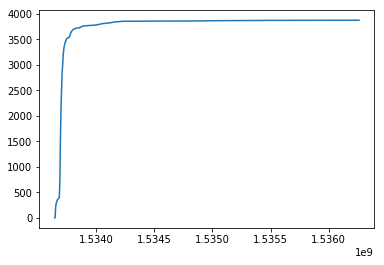

In [19]:
#  第三部分   数据清洗  异常值处理
from datetime import datetime

df = pd.read_excel('Sina_Finance_Comments_All.xlsx',encoding='utf-8')
df.head()

# 评论数随时间变化   (先把str的时间转化位时间戳  然后作为排序的维度)

def time2stamp(cmnttime):
    cmnttime = datetime.strptime(cmnttime, '%Y-%m-%d %H:%M:%S') 
    
    stamp = int(datetime.timestamp(cmnttime))
    return stamp

df['stamp'] = df['time'].apply(time2stamp)



#   创建评论数计数列  根据时间前后  累积

import matplotlib.pyplot as plt

df['cmntcount'] =int(df.shape[0])-df['No']
df['cmntcount'].head()

plt.plot(df.stamp, df.cmntcount);

df.to_excel('Sina_Finance_Comments_All.xlsx')




In [27]:
##    pyecharts 之评论数变化曲

from pyecharts import Bar, Line, Overlap

df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:])
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

df.to_excel('Sina_Finance_Comments_All.xlsx')

#然后通过图标检查数据是否有问题   查看元数据处理问题

In [21]:
#  数据清洗
print(df.shape)
df.drop_duplicates(subset=['nick', 'content'], keep='first',inplace=True)  #删除重复
print(df.shape)


(3872, 19)
(3870, 19)


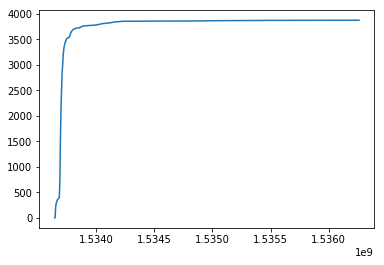

In [34]:
#   第四部分    评论数变化情况

import pandas as pd

df = pd.read_excel('Sina_Finance_Comments_All.xlsx',encoding='utf-8')
df.head()

plt.plot(df.stamp,df.cmntcount)

df

df_ymdcount = df.groupby('time_mdh')['cmntcount'].count()

from pyecharts import Line

line = Line('每日评论数变化')

line.add('日期',df_ymdcount.index,df_ymdcount.values,line_type = 'dotted')
line




In [33]:
from pyecharts import  Bar

bar = Bar('每小时评论')
bar.add('小时',df_mdhcount.index,df_mdhcount.values,is_label_show = True ,xaxis_interval = 0,xaxis_rotate=-90)
bar

#该新浪财经这篇《中国年轻人正带领国家走向危机》文章，有着极其“耸人听闻”的标题，但同样逃不过“速朽”的命运，在一两天内就趋于平淡了。

In [35]:
#  组合图

df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

In [53]:
#   第五部分  省份提取与可视化

df = pd.read_excel('Sina_Finance_Comments_All.xlsx',encoding='utf-8')
df.head()

#统计area

area_count = df.groupby('area')['area'].count().sort_values(ascending=False)
area_name = list(area_count.index)
area_values = area_count.values

print(len(area_name),len(area_values))
print(area_count)

'''
全部3000多条评论数据里，地理信息area_name共337个唯一值，
为了分别对省份和城市进行统计和可视化
需要从area_name里找出可以分离出省份和城市的提取方法，以便apply应用到area列上。
'''

#  省份 数据处理思路
'''
首先再次明确下这次的目的是提取出省份和城市信息，且由于数据量不大，
所以后续只在中国地图上进行可视化，因而海外地理信息统一可以筛选出去，
实现的方式是构建一个unchina的列表，用来存储出现过的海外国家，
然后遍历所有的337条area_name元素，包含这些国家名的就添加到drop列表里，
然后根据其他国内的地理信息的长度分别打印出来，
这样数据就清晰多了！过程中可能有些会被误分，需要核查一遍。

'''
area_len_2 = []
area_len_3 = []
area_len_4 = []
area_len_5 = []
unchina = ['英国','美国','日本','瑞士','法国','瑞典','越南','泰国',
           '意大利','加拿大','菲律宾','新加坡','新西兰','伊拉克','爱尔兰','安哥拉',
           '澳大利亚', '大韩民国', '马来西亚']
droped = []
for area in area_name:
    for unarea in unchina:
        if unarea in area: 
            droped.append(area)
    if len(area)==2 and area not in droped: area_len_2.append(area) # 我国共有34个省级行政区域，包括23个省，5个自治区，4个直辖市，2个特别行政区。
    if len(area)==3 and area not in droped: area_len_3.append(area)
    if len(area)==4 and area not in droped: area_len_4.append(area)
    if len(area)>=5 and area not in droped: area_len_5.append(area)
print(len(droped),'\n', droped)
print(len(area_len_2),'\n', area_len_2)
print(len(area_len_3),'\n', area_len_3)
print(len(area_len_4),'\n', area_len_4)
print(len(area_len_5),'\n', area_len_5)

'''
把海外的先排除  然后按照字数分批
'''

#  省份汇总


prolist = '北京市，天津市，上海市，重庆市，河北省，山西省，辽宁省，吉林省，江苏省，浙江省，安徽省，福建省，\
江西省，山东省，河南省，湖北省，湖南省，广东省，海南省，四川省，贵州省，云南省，陕西省，甘肃省，\
青海省，台湾省，广西，西藏，宁夏，新疆，香港，澳门，内蒙古，黑龙江省'
prolist = prolist.replace('市', '').replace('省', '').split('，')
print(len(prolist), prolist)


#提取省份


def get_pro(area):
    prolist = ['北京', '天津', '上海', '重庆', '河北', '山西', '辽宁', '吉林', '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南', '广东', '海南', '四川', '贵州', '云南', '陕西', '甘肃', '青海', '台湾', '广西', '西藏', '宁夏', '新疆', '香港', '澳门', '内蒙古', '黑龙江']
    for pro in prolist:
        if pro in area:
            return pro
    return "海外"
df['pro'] = df.area.apply(get_pro)
df[['area','pro']]

pro_count = df.groupby('pro')['pro'].count().sort_values(ascending=False)
pro_count

df.to_excel('Sina_Finance_Comments_All.xlsx')


342 342
area
北京              324
上海              285
广东广州            182
四川成都            137
广东深圳            133
湖北武汉            115
重庆               99
江苏南京             97
浙江杭州             88
陕西西安             75
福建福州             74
浙江               69
江苏苏州             64
安徽合肥             52
天津               45
山东济南             44
江苏徐州             43
江西南昌             43
山东青岛             42
江苏无锡             42
河南郑州             41
辽宁沈阳             41
广东佛山             39
广东               39
香港               38
湖南长沙             38
云南昆明             31
山西太原             31
广西南宁             30
北京海淀             30
               ... 
河南焦作              1
菲律宾               1
山西朔州              1
菲律宾西米沙鄢           1
西藏拉萨              1
广东云浮              1
河南信阳              1
瑞士                1
爱尔兰               1
安徽马鞍山             1
湖北潜江              1
美国田纳西州            1
意大利皮埃蒙特           1
四川遂宁              1
越南胡志明市            1
意大利               1
广西贵港              1
湖北孝感              1
广西百色   

In [51]:
from pyecharts import Bar
bar = Bar("省份分布")
 # 换主题  bar.use_theme("macarons")
bar.add("省份", pro_count.index, pro_count.values,is_label_show=True,xaxis_interval=0,xaxis_rotate=-45)
bar

In [52]:
from pyecharts import Map

mapp = Map("省份分布情况", width=1000, height=600)
#mapp.use_theme("macarons") # 换主题
mapp.add("", pro_count.index, pro_count.values, maptype='china', is_visualmap=True,
         visual_range=[0, 480], is_map_symbol_show=False, visual_text_color='#000', is_label_show=True)
mapp



In [62]:
#  城市提取  可视化   流程基本同上

df = pd.read_excel('Sina_Finance_Comments_All.xlsx',encoding='utf-8')
df[['area']]


area_count = df.groupby('area')['area'].count().sort_values(ascending=False)
area_name = list(area_count.index)
area_values = area_count.values
print(len(area_name),len(area_values))
print(area_count)



area_len_2 = []
area_len_3 = []
area_len_4 = []
area_len_5 = []
unchina = ['英国','美国','日本','瑞士','法国','瑞典','越南','泰国',
           '意大利','加拿大','菲律宾','新加坡','新西兰','伊拉克','爱尔兰','安哥拉',
           '澳大利亚', '大韩民国', '马来西亚']
droped = []
for area in area_name:
    for unarea in unchina:
        if unarea in area: 
            droped.append(area)
    if len(area)==2 and area not in droped: area_len_2.append(area) # 我国共有34个省级行政区域，包括23个省，5个自治区，4个直辖市，2个特别行政区。
    if len(area)==3 and area not in droped: area_len_3.append(area)
    if len(area)==4 and area not in droped: area_len_4.append(area)
    if len(area)>=5 and area not in droped: area_len_5.append(area)
print(len(droped),'\n', droped)
print(len(area_len_2),'\n', area_len_2)
print(len(area_len_3),'\n', area_len_3)
print(len(area_len_4),'\n', area_len_4)
print(len(area_len_5),'\n', area_len_5)


prolist = '北京市，天津市，上海市，重庆市，河北省，山西省，辽宁省，吉林省，江苏省，浙江省，安徽省，福建省，\
江西省，山东省，河南省，湖北省，湖南省，广东省，海南省，四川省，贵州省，云南省，陕西省，甘肃省，\
青海省，台湾省，广西，西藏，宁夏，新疆，香港，澳门，内蒙古，黑龙江省'
prolist = prolist.replace('市', '').replace('省', '').split('，')
print(len(prolist), prolist)



#   城市 提取    重点！！

'''
根据以前的经验可知，个别点的经纬度数据可能没有内置，所以调用地图时，
会无法显示并报错。所以先要确定哪些数据可用，哪些不可用，
但到底 ECharts 或 pyecharts 里内置了哪些数据目前还没了解过。望知晓的朋友可以告知。

本次采取的方式是：从 ECharts 官网的effectScatter-bmap示例中提取出城市列表，
便于筛选。当然事先并不知道这里的数据和本次评论的数据的匹配度多高，只能“实践出真知”。

'''

geoCoordMap = {'海门':[121.15,31.89],'鄂尔多斯':[109.781327,39.608266],'招远':[120.38,37.35],'舟山':[122.207216,29.985295],'齐齐哈尔':[123.97,47.33],'盐城':[120.13,33.38],'赤峰':[118.87,42.28],'青岛':[120.33,36.07],'乳山':[121.52,36.89],'金昌':[102.188043,38.520089],'泉州':[118.58,24.93],'莱西':[120.53,36.86],'日照':[119.46,35.42],'胶南':[119.97,35.88],'南通':[121.05,32.08],'拉萨':[91.11,29.97],'云浮':[112.02,22.93],'梅州':[116.1,24.55],'文登':[122.05,37.2],'上海':[121.48,31.22],'攀枝花':[101.718637,26.582347],'威海':[122.1,37.5],'承德':[117.93,40.97],'厦门':[118.1,24.46],'汕尾':[115.375279,22.786211],'潮州':[116.63,23.68],'丹东':[124.37,40.13],'太仓':[121.1,31.45],'曲靖':[103.79,25.51],'烟台':[121.39,37.52],'福州':[119.3,26.08],'瓦房店':[121.979603,39.627114],'即墨':[120.45,36.38],'抚顺':[123.97,41.97],'玉溪':[102.52,24.35],'张家口':[114.87,40.82],'阳泉':[113.57,37.85],'莱州':[119.942327,37.177017],'湖州':[120.1,30.86],'汕头':[116.69,23.39],'昆山':[120.95,31.39],'宁波':[121.56,29.86],'湛江':[110.359377,21.270708],'揭阳':[116.35,23.55],'荣成':[122.41,37.16],'连云港':[119.16,34.59],'葫芦岛':[120.836932,40.711052],'常熟':[120.74,31.64],'东莞':[113.75,23.04],'河源':[114.68,23.73],'淮安':[119.15,33.5],'泰州':[119.9,32.49],'南宁':[108.33,22.84],'营口':[122.18,40.65],'惠州':[114.4,23.09],'江阴':[120.26,31.91],'蓬莱':[120.75,37.8],'韶关':[113.62,24.84],'嘉峪关':[98.289152,39.77313],'广州':[113.23,23.16],'延安':[109.47,36.6],'太原':[112.53,37.87],'清远':[113.01,23.7],'中山':[113.38,22.52],'昆明':[102.73,25.04],'寿光':[118.73,36.86],'盘锦':[122.070714,41.119997],'长治':[113.08,36.18],'深圳':[114.07,22.62],'珠海':[113.52,22.3],'宿迁':[118.3,33.96],'咸阳':[108.72,34.36],'铜川':[109.11,35.09],'平度':[119.97,36.77],'佛山':[113.11,23.05],'海口':[110.35,20.02],'江门':[113.06,22.61],'章丘':[117.53,36.72],'肇庆':[112.44,23.05],'大连':[121.62,38.92],'临汾':[111.5,36.08],'吴江':[120.63,31.16],'石嘴山':[106.39,39.04],'沈阳':[123.38,41.8],'苏州':[120.62,31.32],'茂名':[110.88,21.68],'嘉兴':[120.76,30.77],'长春':[125.35,43.88],'胶州':[120.03336,36.264622],'银川':[106.27,38.47],'张家港':[120.555821,31.875428],'三门峡':[111.19,34.76],'锦州':[121.15,41.13],'南昌':[115.89,28.68],'柳州':[109.4,24.33],'三亚':[109.511909,18.252847],'自贡':[104.778442,29.33903],'吉林':[126.57,43.87],'阳江':[111.95,21.85],'泸州':[105.39,28.91],'西宁':[101.74,36.56],'宜宾':[104.56,29.77],'呼和浩特':[111.65,40.82],'成都':[104.06,30.67],'大同':[113.3,40.12],'镇江':[119.44,32.2],'桂林':[110.28,25.29],'张家界':[110.479191,29.117096],'宜兴':[119.82,31.36],'北海':[109.12,21.49],'西安':[108.95,34.27],'金坛':[119.56,31.74],'东营':[118.49,37.46],'牡丹江':[129.58,44.6],'遵义':[106.9,27.7],'绍兴':[120.58,30.01],'扬州':[119.42,32.39],'常州':[119.95,31.79],'潍坊':[119.1,36.62],'重庆':[106.54,29.59],'台州':[121.420757,28.656386],'南京':[118.78,32.04],'滨州':[118.03,37.36],'贵阳':[106.71,26.57],'无锡':[120.29,31.59],'本溪':[123.73,41.3],'克拉玛依':[84.77,45.59],'渭南':[109.5,34.52],'马鞍山':[118.48,31.56],'宝鸡':[107.15,34.38],'焦作':[113.21,35.24],'句容':[119.16,31.95],'北京':[116.46,39.92],'徐州':[117.2,34.26],'衡水':[115.72,37.72],'包头':[110,40.58],'绵阳':[104.73,31.48],'乌鲁木齐':[87.68,43.77],'枣庄':[117.57,34.86],'杭州':[120.19,30.26],'淄博':[118.05,36.78],'鞍山':[122.85,41.12],'溧阳':[119.48,31.43],'库尔勒':[86.06,41.68],'安阳':[114.35,36.1],'开封':[114.35,34.79],'济南':[117,36.65],'德阳':[104.37,31.13],'温州':[120.65,28.01],'九江':[115.97,29.71],'邯郸':[114.47,36.6],'临安':[119.72,30.23],'兰州':[103.73,36.03],'沧州':[116.83,38.33],'临沂':[118.35,35.05],'南充':[106.110698,30.837793],'天津':[117.2,39.13],'富阳':[119.95,30.07],'泰安':[117.13,36.18],'诸暨':[120.23,29.71],'郑州':[113.65,34.76],'哈尔滨':[126.63,45.75],'聊城':[115.97,36.45],'芜湖':[118.38,31.33],'唐山':[118.02,39.63],'平顶山':[113.29,33.75],'邢台':[114.48,37.05],'德州':[116.29,37.45],'济宁':[116.59,35.38],'荆州':[112.239741,30.335165],'宜昌':[111.3,30.7],'义乌':[120.06,29.32],'丽水':[119.92,28.45],'洛阳':[112.44,34.7],'秦皇岛':[119.57,39.95],'株洲':[113.16,27.83],'石家庄':[114.48,38.03],'莱芜':[117.67,36.19],'常德':[111.69,29.05],'保定':[115.48,38.85],'湘潭':[112.91,27.87],'金华':[119.64,29.12],'岳阳':[113.09,29.37],'长沙':[113,28.21],'衢州':[118.88,28.97],'廊坊':[116.7,39.53],'菏泽':[115.480656,35.23375],'合肥':[117.27,31.86],'武汉':[114.31,30.52],'大庆':[125.03,46.58]};
citys = list(geoCoordMap.keys())
print(citys)

def get_city(area):
    citys = ['海门', '鄂尔多斯', '招远', '舟山', '齐齐哈尔', '盐城', '赤峰', '青岛', '乳山', '金昌', '泉州', '莱西', '日照', '胶南', '南通', '拉萨', '云浮', '梅州', '文登', '上海', '攀枝花', '威海', '承德', '厦门', '汕尾', '潮州', '丹东', '太仓', '曲靖', '烟台', '福州', '瓦房店', '即墨', '抚顺', '玉溪', '张家口', '阳泉', '莱州', '湖州', '汕头', '昆山', '宁波', '湛江', '揭阳', '荣成', '连云港', '葫芦岛', '常熟', '东莞', '河源', '淮安', '泰州', '南宁', '营口', '惠州', '江阴', '蓬莱', '韶关', '嘉峪关', '广州', '延安', '太原', '清远', '中山', '昆明', '寿光', '盘锦', '长治', '深圳', '珠海', '宿迁', '咸阳', '铜川', '平度', '佛山', '海口', '江门', '章丘', '肇庆', '大连', '临汾', '吴江', '石嘴山', '沈阳', '苏州', '茂名', '嘉兴', '长春', '胶州', '银川', '张家港', '三门峡', '锦州', '南昌', '柳州', '三亚', '自贡', '吉林', '阳江', '泸州', '西宁', '宜宾', '呼和浩特', '成都', '大同', '镇江', '桂林', '张家界', '宜兴', '北海', '西安', '金坛', '东营', '牡丹江', '遵义', '绍兴', '扬州', '常州', '潍坊', '重庆', '台州', '南京', '滨州', '贵阳', '无锡', '本溪', '克拉玛依', '渭南', '马鞍山', '宝鸡', '焦作', '句容', '北京', '徐州', '衡水', '包头', '绵阳', '乌鲁木齐', '枣庄', '杭州', '淄博', '鞍山', '溧阳', '库尔勒', '安阳', '开封', '济南', '德阳', '温州', '九江', '邯郸', '临安', '兰州', '沧州', '临沂', '南充', '天津', '富阳', '泰安', '诸暨', '郑州', '哈尔滨', '聊城', '芜湖', '唐山', '平顶山', '邢台', '德州', '济宁', '荆州', '宜昌', '义乌', '丽水', '洛阳', '秦皇岛', '株洲', '石家庄', '莱芜', '常德', '保定', '湘潭', '金华', '岳阳', '长沙', '衢州', '廊坊', '菏泽', '合肥', '武汉', '大庆']
    unchinas = ['英国','美国','日本','瑞士','法国','瑞典','越南','泰国','意大利','加拿大','菲律宾','新加坡','新西兰','伊拉克','爱尔兰','安哥拉','澳大利亚', '大韩民国', '马来西亚']
    for city in citys:
        if city in area:
            return city
    for unchina in unchinas:
        if unchina in area:
            return "unknown"

df['city'] = df.area.apply(get_city)
df[['area','city']]

#会出现一堆unknown 和 None  这个时候去掉前缀

df_unknown = df[['area','city']][df['city']=='unknown']
print(df_unknown.shape)
unknown_city = list(set(df_unknown.area.values.tolist()))
print(len(unknown_city),unknown_city)


prolist_less = [ '河北', '山西', '辽宁', '吉林', '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南', '广东', '海南', '四川', '贵州', '云南', '陕西', '甘肃', '青海', '广西', '西藏', '宁夏', '新疆', '香港', '澳门', '内蒙古', '黑龙江']
unkwns = []
others = []
for unkwn in unknown_city:
    for pro in prolist_less:
        if pro in unkwn: #  '青海海南藏族自治州'
            unkwn = unkwn.replace(pro, '')
            unkwns.append(unkwn)
    if unkwn not in unkwns:
        others.append(unkwn)
print(len(unkwns))
print(unkwns) # '青海藏族自治州', '藏族自治州'
print(len(others))
print(others)

all_citys = citys + unkwns

342 342
area
北京              324
上海              285
广东广州            182
四川成都            137
广东深圳            133
湖北武汉            115
重庆               99
江苏南京             97
浙江杭州             88
陕西西安             75
福建福州             74
浙江               69
江苏苏州             64
安徽合肥             52
天津               45
山东济南             44
江苏徐州             43
江西南昌             43
山东青岛             42
江苏无锡             42
河南郑州             41
辽宁沈阳             41
广东佛山             39
广东               39
香港               38
湖南长沙             38
云南昆明             31
山西太原             31
广西南宁             30
北京海淀             30
               ... 
河南焦作              1
菲律宾               1
山西朔州              1
菲律宾西米沙鄢           1
西藏拉萨              1
广东云浮              1
河南信阳              1
瑞士                1
爱尔兰               1
安徽马鞍山             1
湖北潜江              1
美国田纳西州            1
意大利皮埃蒙特           1
四川遂宁              1
越南胡志明市            1
意大利               1
广西贵港              1
湖北孝感              1
广西百色   

In [63]:
#刚刚许多处理之后终于把城市弄齐全了  这里就更新城市

#个人感觉这里略显繁琐，如果可以直接去掉省份然后保留后面字符，再做成city可能会方便

def get_city(area):
    all_citys = ['海门', '鄂尔多斯', '招远', '舟山', '齐齐哈尔', '盐城', '赤峰', '青岛', '乳山', '金昌', '泉州', '莱西', 
                 '日照', '胶南', '南通', '拉萨', '云浮', '梅州', '文登', '上海', '攀枝花', '威海', '承德', '厦门', '汕尾', 
                 '潮州', '丹东', '太仓', '曲靖', '烟台', '福州', '瓦房店', '即墨', '抚顺', '玉溪', '张家口', '阳泉', '莱州',
                 '湖州', '汕头', '昆山', '宁波', '湛江', '揭阳', '荣成', '连云港', '葫芦岛', '常熟', '东莞', '河源', '淮安', 
                 '泰州', '南宁', '营口', '惠州', '江阴', '蓬莱', '韶关', '嘉峪关', '广州', '延安', '太原', '清远', '中山', 
                 '昆明', '寿光', '盘锦', '长治', '深圳', '珠海', '宿迁', '咸阳', '铜川', '平度', '佛山', '海口', '江门', 
                 '章丘', '肇庆', '大连', '临汾', '吴江', '石嘴山', '沈阳', '苏州', '茂名', '嘉兴', '长春', '胶州', '银川', 
                 '张家港', '三门峡', '锦州', '南昌', '柳州', '三亚', '自贡', '吉林', '阳江', '泸州', '西宁', '宜宾',
                 '呼和浩特', '成都', '大同', '镇江', '桂林', '张家界', '宜兴', '北海', '西安', '金坛', '东营', '牡丹江', 
                 '遵义', '绍兴', '扬州', '常州', '潍坊', '重庆', '台州', '南京', '滨州', '贵阳', '无锡', '本溪', '克拉玛依', 
                 '渭南', '马鞍山', '宝鸡', '焦作', '句容', '北京', '徐州', '衡水', '包头', '绵阳', '乌鲁木齐', '枣庄', 
                 '杭州', '淄博', '鞍山', '溧阳', '库尔勒', '安阳', '开封', '济南', '德阳', '温州', '九江', '邯郸', '临安', 
                 '兰州', '沧州', '临沂', '南充', '天津', '富阳', '泰安', '诸暨', '郑州', '哈尔滨', '聊城', '芜湖', '唐山', 
                 '平顶山', '邢台', '德州', '济宁', '荆州', '宜昌', '义乌', '丽水', '洛阳', '秦皇岛', '株洲', '石家庄', 
                 '莱芜', '常德', '保定', '湘潭', '金华', '岳阳', '长沙', '衢州', '廊坊', '菏泽', '合肥', '武汉', '大庆', 
                 '眉山', '漯河', '滁州', '景德镇', '随州', '遂宁', '三明', '乌兰察布', '吕梁', '莆田', '河池', '定西', 
                 '信阳', '阜新', '广元', '汉中', '辽阳', '邵阳', '萍乡', '晋中', '商洛', '乐山', '石河子', '白银', '池州', 
                 '内江', '恩施', '益阳', '伊犁', '张掖', '运城', '绥化', '崇左', '南阳', '达州', '海东', '伊春', '黄石', 
                 '龙岩', '蚌埠', '上饶', '驻马店', '保山', '呼伦贝尔', '安庆', '淮北', '周口', '孝感', '临沧', '固原', '钦州', 
                 '漳州', '巴音郭楞', '宜春', '朝阳', '鹰潭', '娄底', '雅安', '青海', '怀化', '郴州', '许昌', '红河', '赣州', 
                 '朔州', '普洱', '吴忠', '新乡', '资阳', '鸡西', '昌吉', '荆门', '六安', '黄山', '商丘', '武威', '抚州', 
                 '湘西', '怒江', '铁岭', '百色', '淮南', '广安', '铜陵', '濮阳', '天水', '襄阳', '南平', '阜阳', '鹤壁', 
                 '塔城', '宁德', '大理', '梧州', '衡阳', '晋城', '昭通', '黄冈', '永州', '毕节', '通辽', '玉林', '兴安盟', 
                 '咸宁']
    for city in all_citys:
        if city in area:
            return city
    return "other"
df['city'] = df.area.apply(get_city)
df[['area','city']]



,area,city
0,广东广州,广州
1,广东深圳,深圳
2,江西南昌,南昌
3,重庆,重庆
4,重庆,重庆
5,四川雅安,雅安
6,江苏南京,南京
7,河南郑州,郑州
8,河南郑州,郑州
9,广东东莞,东莞


In [65]:
#   城市分布

city_count = df.groupby('city')['city'].count().sort_values(ascending=False)
city_count


from pyecharts import Bar
#bar.use_theme("macarons")
bar = Bar("城市分布")
bar.add("城市", city_count.index[:30], city_count.values[:30],is_label_show=True,xaxis_interval=0,xaxis_rotate=-45)
bar




In [66]:
#把city组合成元祖  方便后续调用

city_data = list(zip(city_count.index, city_count.values))
city_data

[('other', 483),
 ('北京', 358),
 ('上海', 288),
 ('广州', 182),
 ('成都', 137),
 ('深圳', 133),
 ('武汉', 115),
 ('重庆', 99),
 ('南京', 97),
 ('杭州', 88),
 ('西安', 75),
 ('福州', 74),
 ('苏州', 64),
 ('合肥', 52),
 ('天津', 50),
 ('济南', 44),
 ('南昌', 43),
 ('徐州', 43),
 ('青岛', 42),
 ('无锡', 42),
 ('郑州', 41),
 ('沈阳', 41),
 ('佛山', 39),
 ('长沙', 38),
 ('昆明', 31),
 ('太原', 31),
 ('南宁', 30),
 ('兰州', 29),
 ('东莞', 29),
 ('呼和浩特', 28),
 ('开封', 26),
 ('哈尔滨', 24),
 ('石家庄', 23),
 ('南通', 23),
 ('大连', 22),
 ('绍兴', 20),
 ('吉林', 18),
 ('长春', 15),
 ('贵阳', 14),
 ('宁波', 14),
 ('厦门', 14),
 ('盘锦', 14),
 ('金华', 13),
 ('温州', 13),
 ('临沂', 13),
 ('晋城', 12),
 ('常州', 12),
 ('内江', 11),
 ('汕头', 11),
 ('淄博', 11),
 ('乌鲁木齐', 11),
 ('洛阳', 11),
 ('扬州', 11),
 ('泰州', 10),
 ('中山', 10),
 ('泉州', 10),
 ('济宁', 9),
 ('湖州', 9),
 ('嘉兴', 9),
 ('包头', 9),
 ('烟台', 9),
 ('宜昌', 9),
 ('惠州', 8),
 ('保定', 8),
 ('潍坊', 8),
 ('廊坊', 8),
 ('海口', 8),
 ('连云港', 8),
 ('台州', 8),
 ('大同', 7),
 ('西宁', 7),
 ('银川', 7),
 ('柳州', 7),
 ('周口', 7),
 ('襄阳', 7),
 ('邯郸', 7),
 ('绵阳', 7),
 ('

In [70]:
#  城市分布地图异常
'''
from pyecharts import Geo

geo = Geo("城市分布情况", "data from SinaNews", title_color="#fff",
          title_pos="center", width=800,
          height=600, background_color='#404a59')
attr, value = geo.cast(city_data)
geo.add("城市分布情况", attr, value, visual_range=[0, 360], visual_text_color="#fff",
        symbol_size=10, is_visualmap=True)
geo
'''

#会有城市是没有坐标的   这个时候根据报错的信息把没有坐标的城市记录下来  然后做成一个list
#用下面的代码把没有坐标的城市排除

city_data = []
nocoor_list = [
    'other','青海','达州','崇左','巴音郭楞','普洱','池州','湘西','伊犁','乌兰察布','临沧','海东','眉山',
    '怒江','固原','广安'
             ]
for item in zip(city_count.index, city_count.values):
    if item[0] in nocoor_list:
        continue  # 跳出循环：即遇到不存在经纬度的城市就跳过，不用存储到 city_data 里
    city_data.append(item)
city_data


from pyecharts import Geo
geo = Geo("城市分布情况", "data from SinaNews", title_color="#fff",
          title_pos="center", width=800,
          height=600, background_color='#404a59')
attr, value = geo.cast(city_data)
geo.add("", attr, value, visual_range=[0, 360], visual_text_color="#fff",
        symbol_size=10, is_visualmap=True)
geo


'''
先给点提醒用的是WEB 服务API - 百度地图获取area列地理位置的经纬度
（经过之前文章的学习，想象大家已经能够轻松自如的实现这些步骤了），
然后导出包含经纬度两列的完整数据到 csv
'''

df.to_excel('Sina_Finance_Comments_All.xlsx')


In [ ]:
#  第七部分   利用百度api获取经纬度 

#https://www.jianshu.com/p/aced7244d5a6

In [105]:
#  第八部分    表情包提取

import pandas as pd
df = pd.read_excel('Sina_Finance_Comments_All.xlsx',encoding='utf-8')



#提取emoji

import re
def get_emoji(content):
    pattern =re.compile(u"\[[a-zA-Z\u4e00-\u9fa5]+\]")
    result=re.findall(pattern,content)
    return result
df['emojis_list'] = df['content'].apply(get_emoji)
df.head()


emojis = df['emojis_list'].values.tolist()

#合并为单一列表

emojis_list = sum(emojis,[])
emojis_set = list(set(emojis_list))
num = len(emojis_set)
print(num)
print(emojis_set)

#统计emoji个数

from collections import Counter
counter = Counter(emojis_list)
print(counter.most_common())


76
['[泪]', '[呵呵]', '[晕]', '[中国赞]', '[围观]', '[允悲]', '[小黄人得意]', '[坏笑]', '[憧憬]', '[鄙视]', '[微笑]', '[皱眉]', '[给力]', '[米奇比心]', '[抱抱]', '[小黄人坏笑]', '[亲亲]', '[汗]', '[哈欠]', '[疑问]', '[爱你]', '[悲伤]', '[费解]', '[哼]', '[猪头]', '[生病]', '[白眼]', '[嘻嘻]', '[怒]', '[挖鼻]', '[吃瓜]', '[米奇大哭]', '[費解]', '[嘘]', '[可怜]', '[笑而不语]', '[可爱]', '[阴险]', '[失望]', '[跪了]', '[污]', '[笑cry]', '[握手]', '[鼓掌]', '[羞嗒嗒]', '[吐]', '[吃惊]', '[拜拜]', '[衰]', '[哆啦A梦汗]', '[太开心]', '[挤眼]', '[哈哈]', '[怒骂]', '[doge]', '[闭嘴]', '[威武]', '[鲜花]', '[思考]', '[睡]', '[摊手]', '[并不简单]', '[喵喵]', '[嘿哈]', '[攤手]', '[二哈]', '[骷髅]', '[good]', '[耶]', '[黑线]', '[ok]', '[作揖]', '[哆啦A梦微笑]', '[赞]', '[偷笑]', '[打脸]']
[('[doge]', 202), ('[二哈]', 150), ('[允悲]', 133), ('[摊手]', 101), ('[费解]', 100), ('[微笑]', 85), ('[笑cry]', 79), ('[吃瓜]', 68), ('[嘻嘻]', 44), ('[跪了]', 36), ('[吐]', 35), ('[并不简单]', 34), ('[笑而不语]', 34), ('[喵喵]', 29), ('[挖鼻]', 25), ('[拜拜]', 24), ('[太开心]', 20), ('[good]', 16), ('[哈哈]', 16), ('[作揖]', 15), ('[泪]', 14), ('[偷笑]', 10), ('[汗]', 10), ('[哆啦A梦汗]', 9), ('[失望]', 9), ('[疑问

In [88]:
#  使用情况分析

y_emojis, x_counts = zip(*counter.most_common())  #利用zip把数值打包  赋值
from pyecharts import Bar
bar = Bar("emoji 使用情况")
bar.add("emoji", y_emojis[:20], x_counts[:20], is_stack=True,is_label_show=True,xaxis_interval=0,xaxis_rotate=-45,xaxis_margin=8)
bar





In [95]:
#  评论 数据   这部分看不懂  去问问老师吧...

cmnts_list = df['content'].values.tolist()
cmnts = ' '.join(cmnts_list)   #合并成一串完整的方便分词  


import jieba
emoji_drop = []
for emojis in y_emojis:
    emoji = emojis[1:-1] # 去掉括号
    jieba.add_word(emoji) # 读者可将上一行注释掉，看看分词结果
    emoji_drop.append(emoji) # 将去掉括号后的emoji单独保存
words = list(jieba.cut(cmnts))
print(len(words))
print(words)



56250
['脑子', '有病', '。', '每个', '人有', '每个', '人', '的', '消费观', '。', '你', '爱', '存钱', '那', '是', '你', '自己', '的', '良好习惯', '。', '别人', '喜欢', '投资', ' ', '喜欢', '购买', '等值', '服务', '是', '人家', '的', '选择', '。', '何来', '畸形', '一说', '？', ' ', '17', '个点', '的', '增值税', ' ', '哈哈', ' ', '爸爸妈妈', '买房', '，', '说', '啃', '老', '。', '自己', '不', '买房', '，', '说', '没', '上进心', '。', '不生', '娃', '，', '说', '是', '自私', '。', '那', '是因为', '大部分', '90', '后', '的', '我们', '真的', '不', '富裕', '，', '没法', '一下子', '拿出', '几十', '百万', '买房子', '。', '这', '也', '会', '被', '说', '，', '为什么', '不', '努力', '工作', '？', '[', '皱眉', ']', '要', '我们', '怎样', '？', ' ', '80', '后', '买不起', '房', '，', '90', '后', '不想', '买房', '。', ' ', '连', '交通', '信息卡', '都', '发', '的', '信用卡', '，', '现在', '又', '怪', '我们', '借贷', '过度', '，', '没有', '辛苦', '攒钱', '？', ' ', '我们', '努力', '工作', '，', '熬成', '秃头', '，', '辛辛苦苦', '赚钱', '想用', '用', '智能机', '，', '想', '旅', '旅游', '，', '也', '错', '了', '？', '不想', '辛辛苦苦', '攒钱', '还', '房贷', '，', '也', '错', '了', '？', ' ', '十年', '前', '的', '媒体', '：', '当', '60', '岁', '的', '中国', '人', 

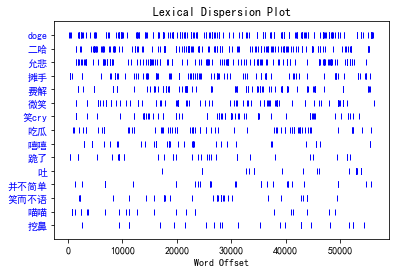

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.draw.dispersion import dispersion_plot

plt.rcParams['font.sans-serif'] = ['SimHei']
ntext = nltk.Text(words)
ntext.dispersion_plot(emoji_drop[:15])



In [100]:
#  第九部分   情感分析与词云

#SnowNLP 情感打分 

import pandas as pd
from snownlp import SnowNLP
df = pd.read_csv('Sina_Finance_Comments_All_20180811_Cleaned.csv',encoding='utf-8')

def sentiment(content):
    s = SnowNLP(content)
    return s.sentiments

df['sentiment'] = df.content.apply(sentiment)

df_sent = df[['content', 'sentiment']]    #留意这个抽取列的方法
df_sent.sort_values(by=['sentiment'],ascending=False)



,content,city
0,脑子有病。每个人有每个人的消费观。你爱存钱那是你自己的良好习惯。别人喜欢投资 喜欢购买等值服...,广州
1,17个点的增值税,深圳
2,哈哈,南昌
3,爸爸妈妈买房，说啃老。自己不买房，说没上进心。不生娃，说是自私。那是因为大部分90后的我们真...,重庆
4,80后买不起房，90后不想买房。 连交通信息卡都发的信用卡，现在又怪我们借贷过度，没有辛苦攒...,重庆
5,十年前的媒体：当60岁的中国人终于攒到够钱买了个房子时，60岁的美国人则还清了住了30年房子...,雅安
6,从11年借到18年，说的不就是我嘛[doge],南京
7,还有可以送孩子出国留学 然后 ……你懂了么,郑州
8,不懂啥 炒房可以发家致富 而你却拿来住 简直浪费 建议你有机会也去炒房 根本不用上班 天天吃...,郑州
9,哦。[摊手][摊手][摊手],东莞


In [ ]:
#   基于 TF-IDF 算法的关键词抽取

import jieba.analyse
all_content = df.content.values.tolist()
extract_tags = "  ".join(jieba.analyse.extract_tags(' '.join(all_content), topK=200, withWeight=False, allowPOS=('ns', 'n')))
print(extract_tags)



In [111]:
#  词云

import jieba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

all_content = df.content.values.tolist()
print(len(all_content), '\n', all_content[-1])

segment = []
for line in all_content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue
# 去停用词
words_df = pd.DataFrame({"segment": segment})

words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数": np.size})
words_stat = words_stat.reset_index().sort_values(by=["计数"], ascending=False)
words_stat.head(20)



['a', 'b', 'c']

In [ ]:
from pyecharts import WordCloud
wordcloud = WordCloud(width=800, height=520)
wordcloud.add("评论词云", words_stat['segment'], words_stat['计数'], word_size_range=[20, 100])
wordcloud

